# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch with your name, based on the "main" branch and switch to your own branch.
- Copy this notebook to the work space of your group, and rename it to TD_WP_1_Your name.ipynb
- After finishing this task, push your changes to the github repository of your group.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

In [1]:
# Your code here.

from utility import read_all_csvs_one_test
import pandas as pd

# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'
dictionary_name = '20240105_164214'
path = base_dictionary + dictionary_name

# Read the data.
df_data = read_all_csvs_one_test(path, dictionary_name)
df_data.head()


time  data_motor_1_position  data_motor_1_temperature  \
0  76522.025433                     86                        42   
1  76522.125464                     86                        42   
2  76522.225432                     86                        42   
3  76522.325432                     86                        42   
4  76522.425451                     86                        42   

   data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  7223                   0                    501   
1                  7214                   0                    502   
2                  7137                   0                    501   
3                  7135                   0                    501   
4                  7212                   0                    502   

   data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                        31                  7334                   0   
1                        31                  7250                   0   
2                        31                  7234                   0   
3                        31                  7250                   0   
4                        31                  7232                   0   

   data_motor_3_position  ...  data_motor_6_label  data_motor_4_position  \
0                     80  ...                   0                    825   
1                     80  ...                   0                    825   
2                     79  ...                   0                    825   
3                     79  ...                   0                    825   
4                     79  ...                   0                    824   

   data_motor_4_temperature  data_motor_4_voltage  data_motor_4_label  \
0                        25                  7270                   0   
1                        25                  7345                   0   
2                        25                  7277                   0   
3                        25                  7263                   0   
4                        25                  7303                   0   

   data_motor_5_position  data_motor_5_temperature  data_motor_5_voltage  \
0                    619                        43                  7312   
1                    619                        43                  7332   
2                    619                        43                  7330   
3                    619                        43                  7319   
4                    619                        43                  7348   

   data_motor_5_label   test_condition  
0                   0  20240105_164214  
1                   0  20240105_164214  
2                   0  20240105_164214  
3                   0  20240105_164214  
4                   0  20240105_164214  

[5 rows x 26 columns]

Please explain the structure (what does each column represent) of the resulted dataframe here.

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



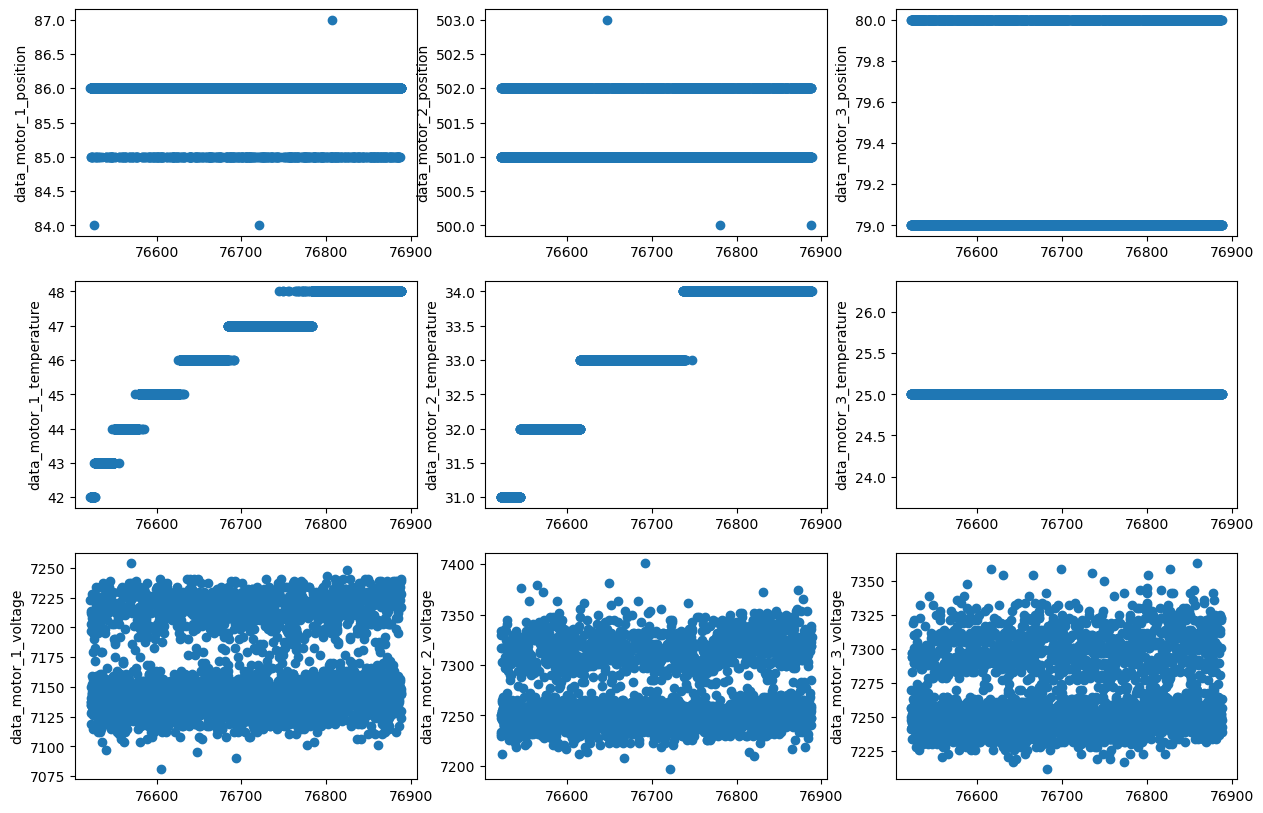

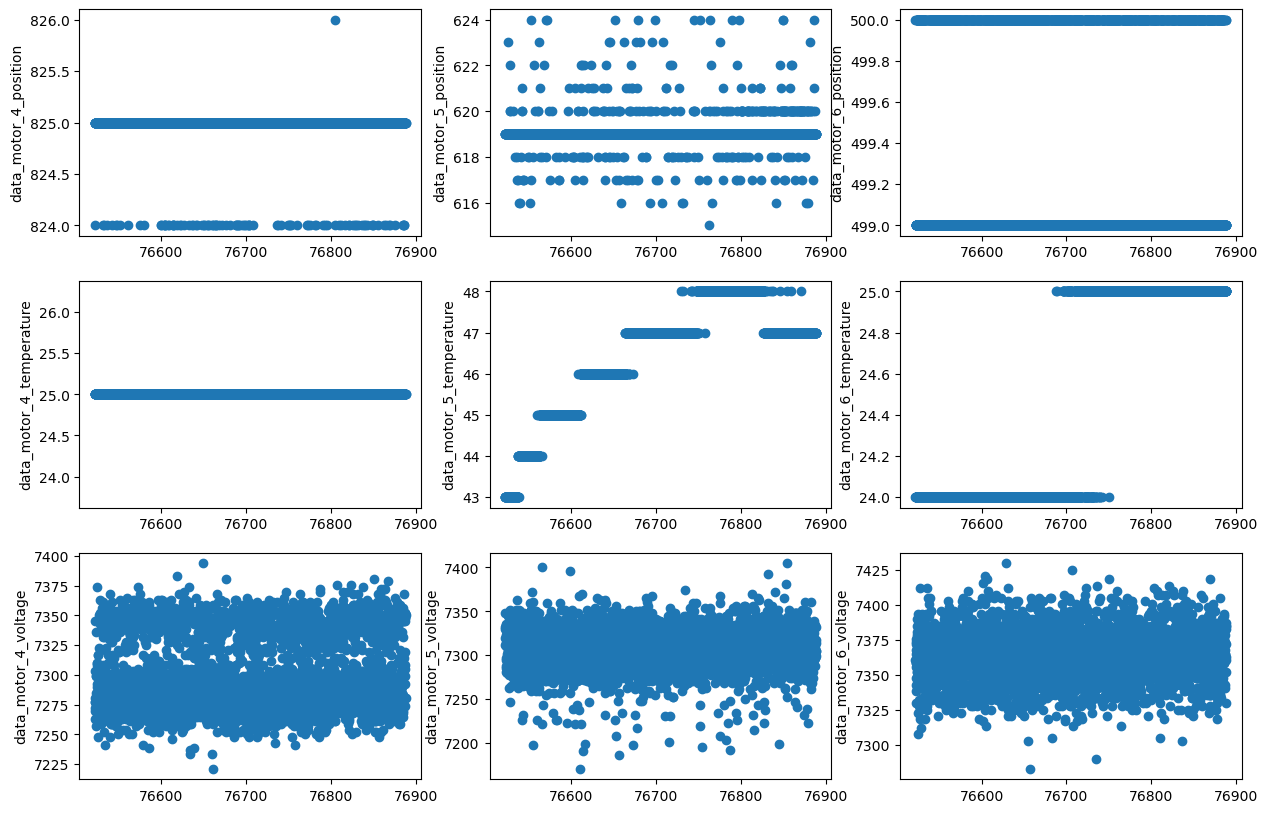

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



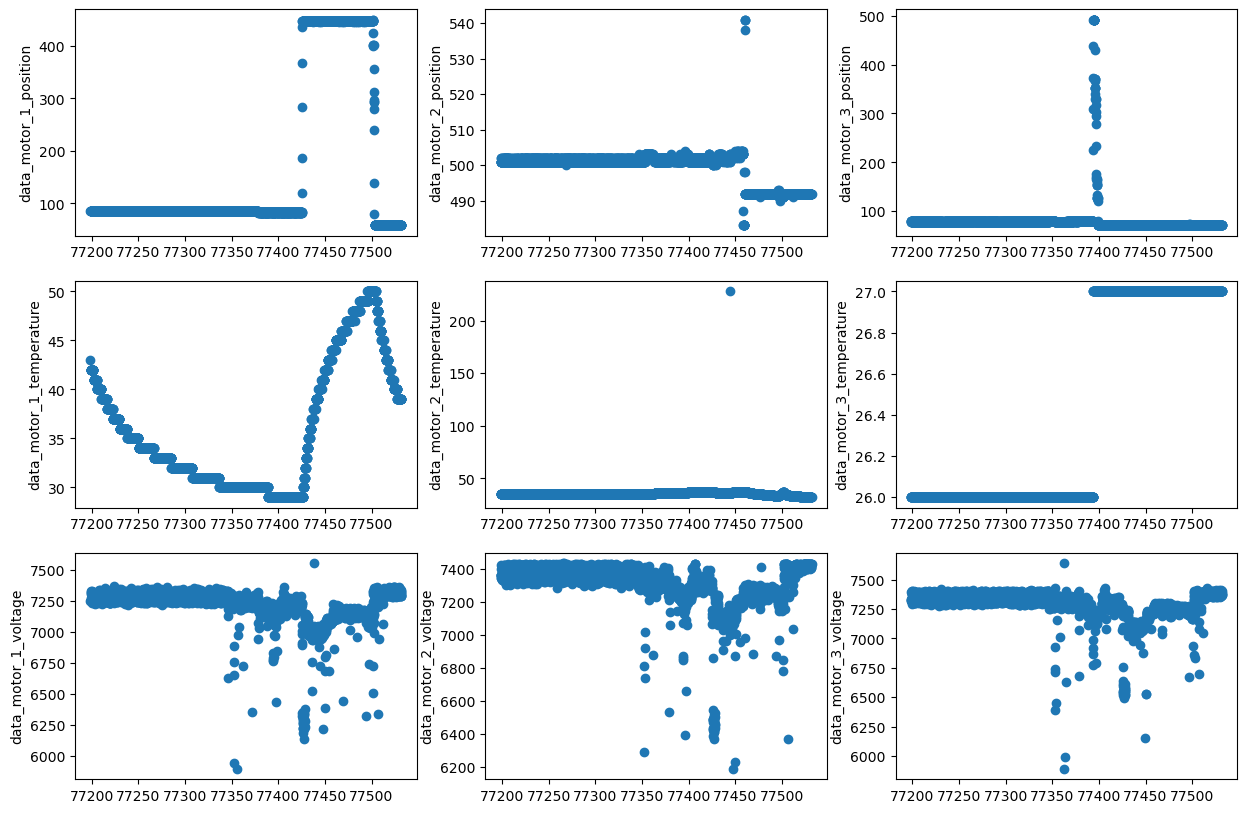

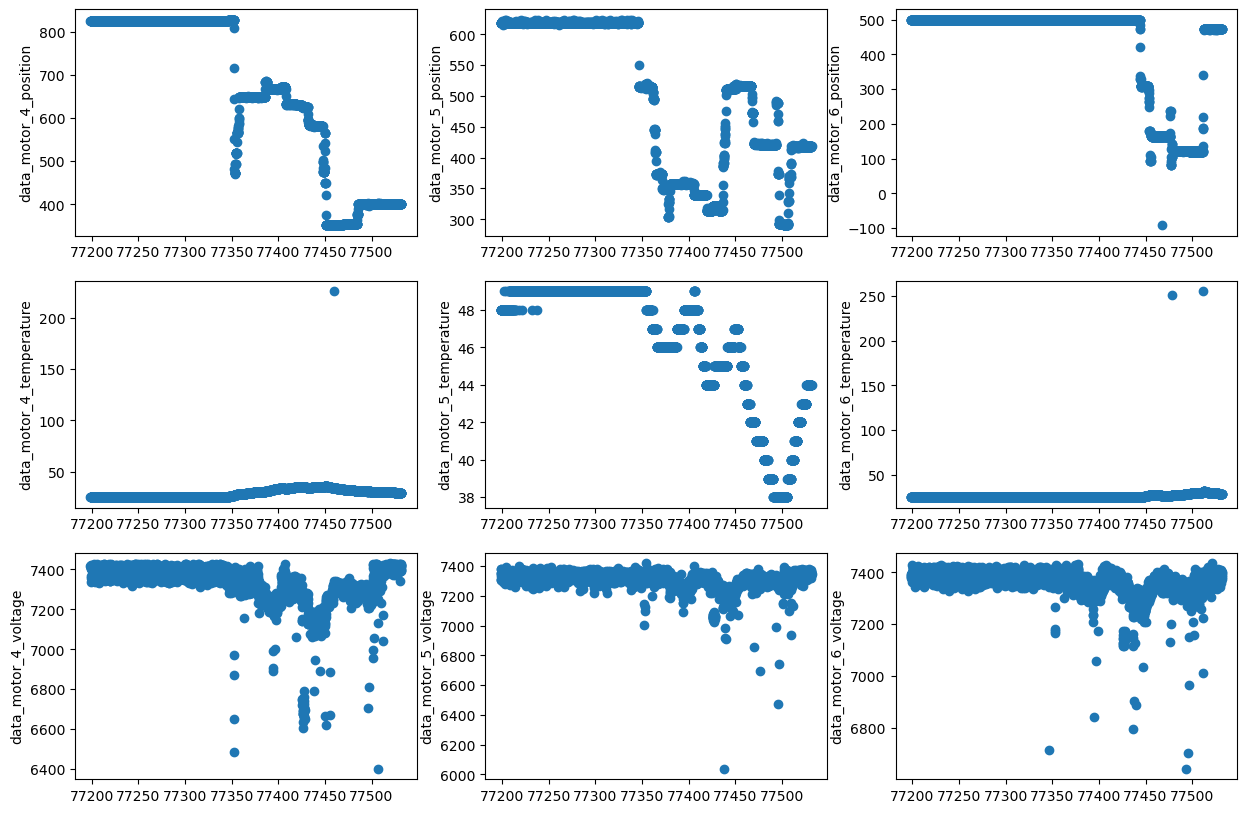

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



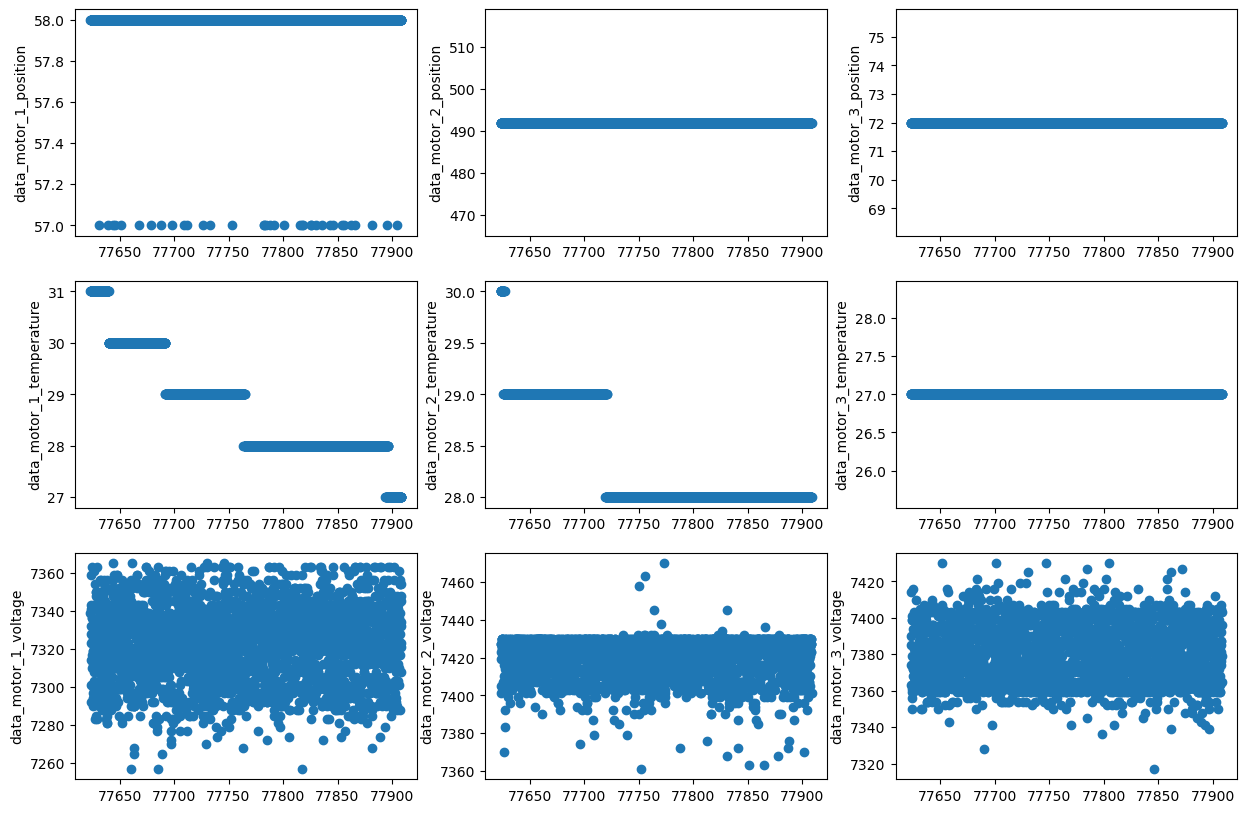

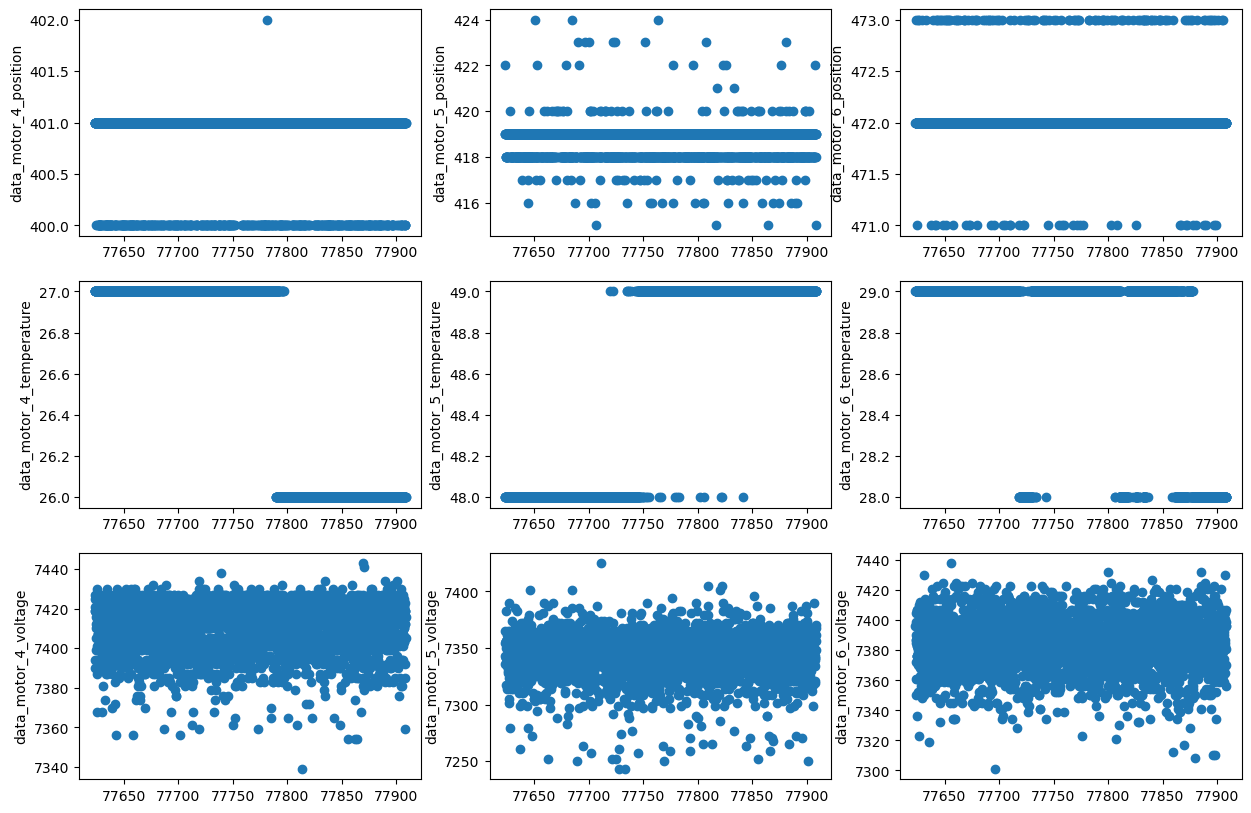

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



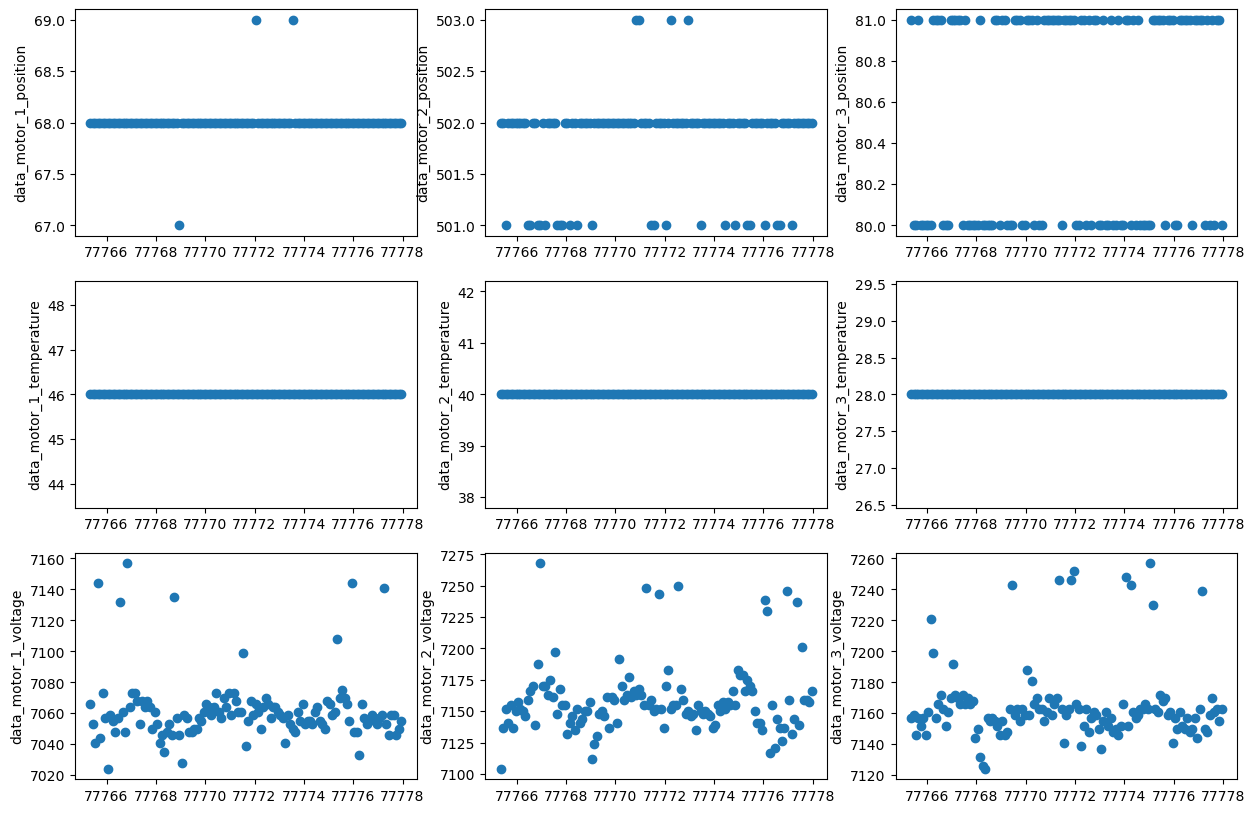

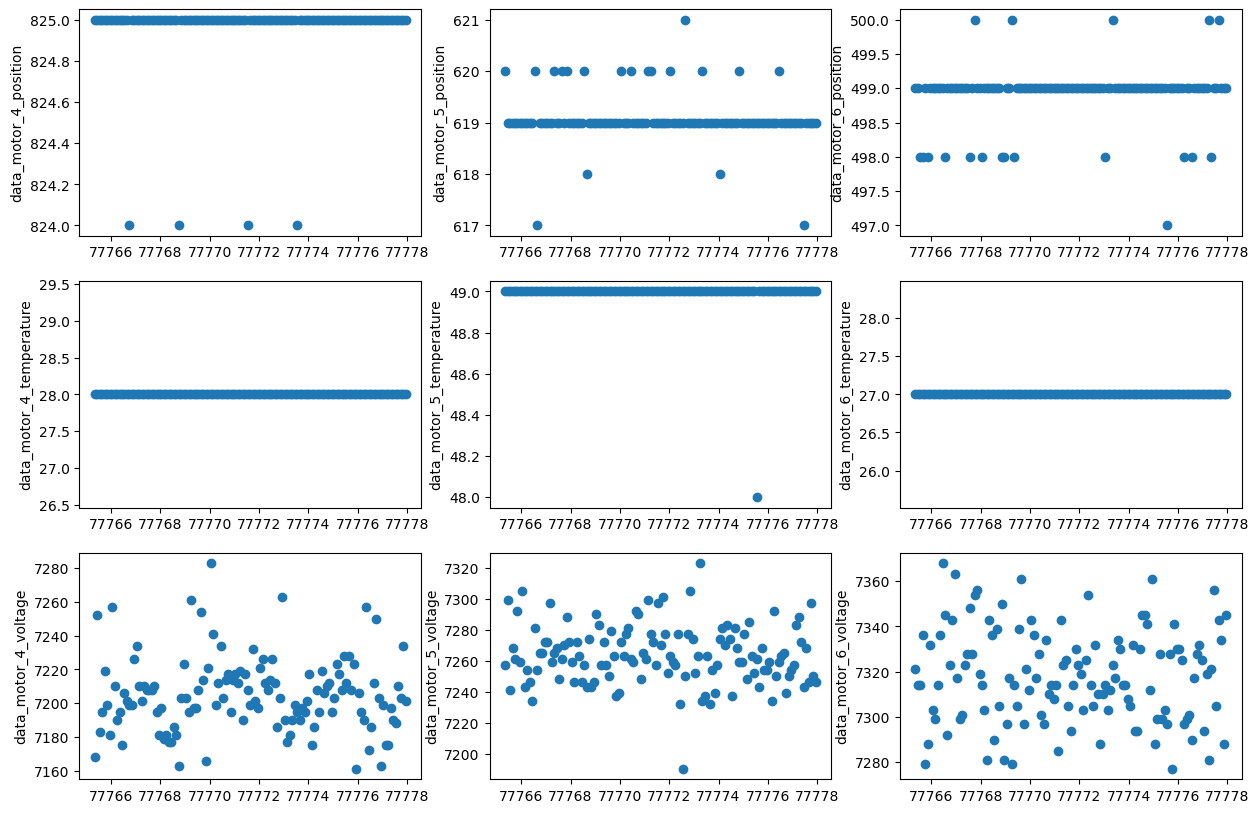

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



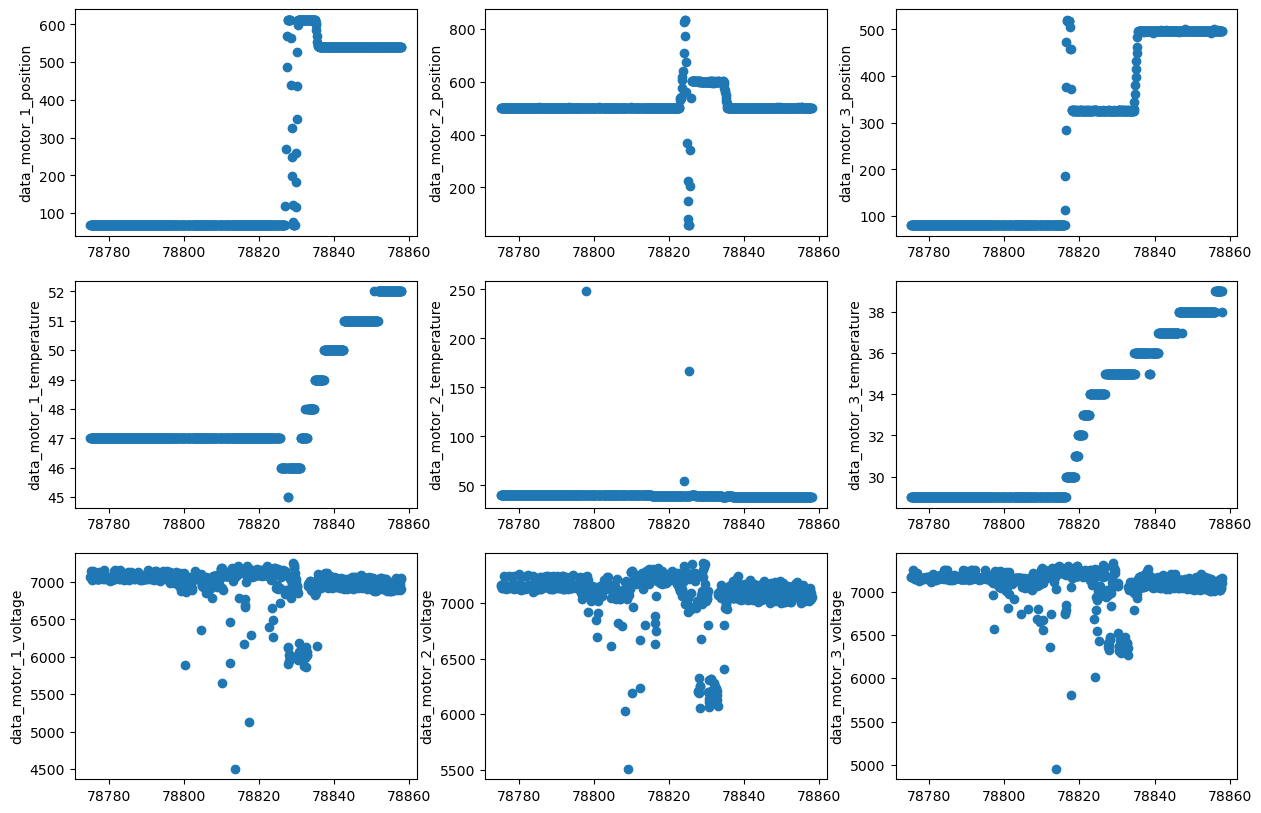

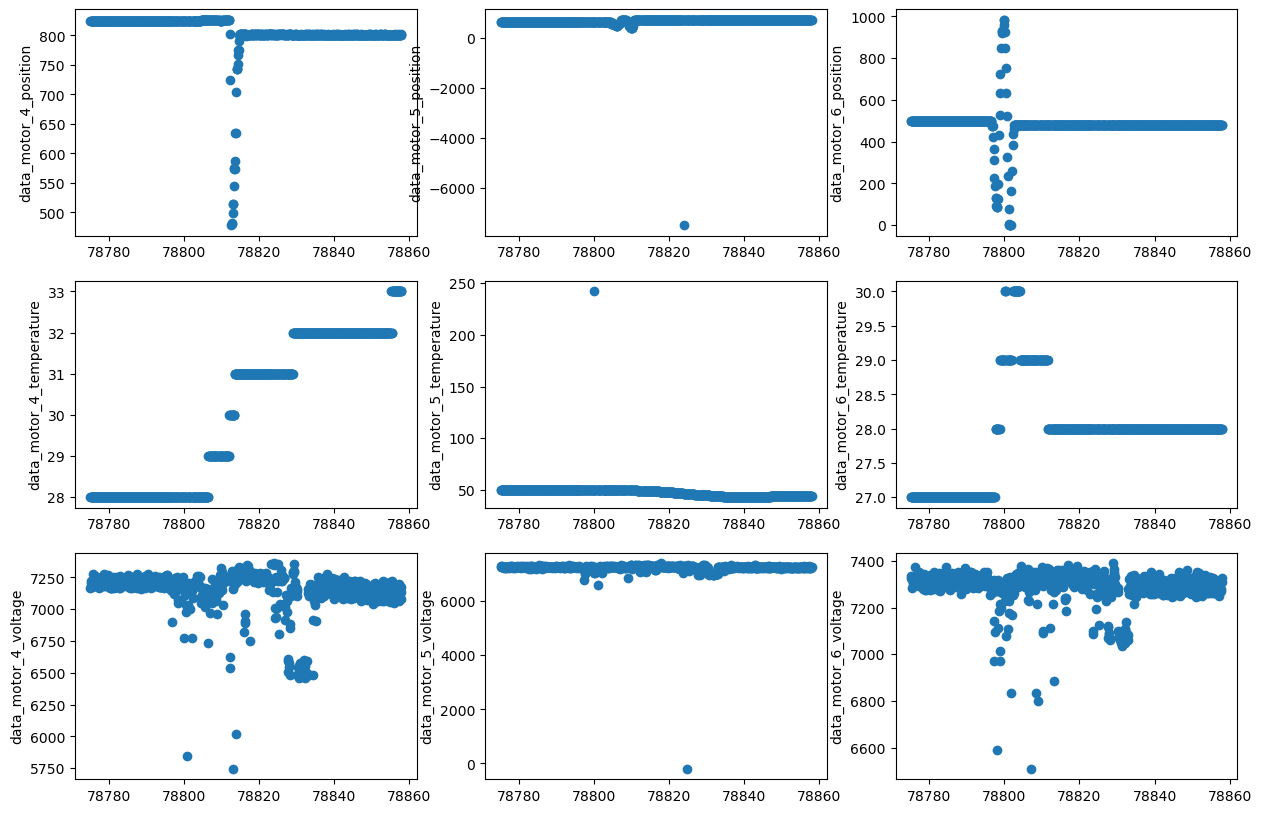

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



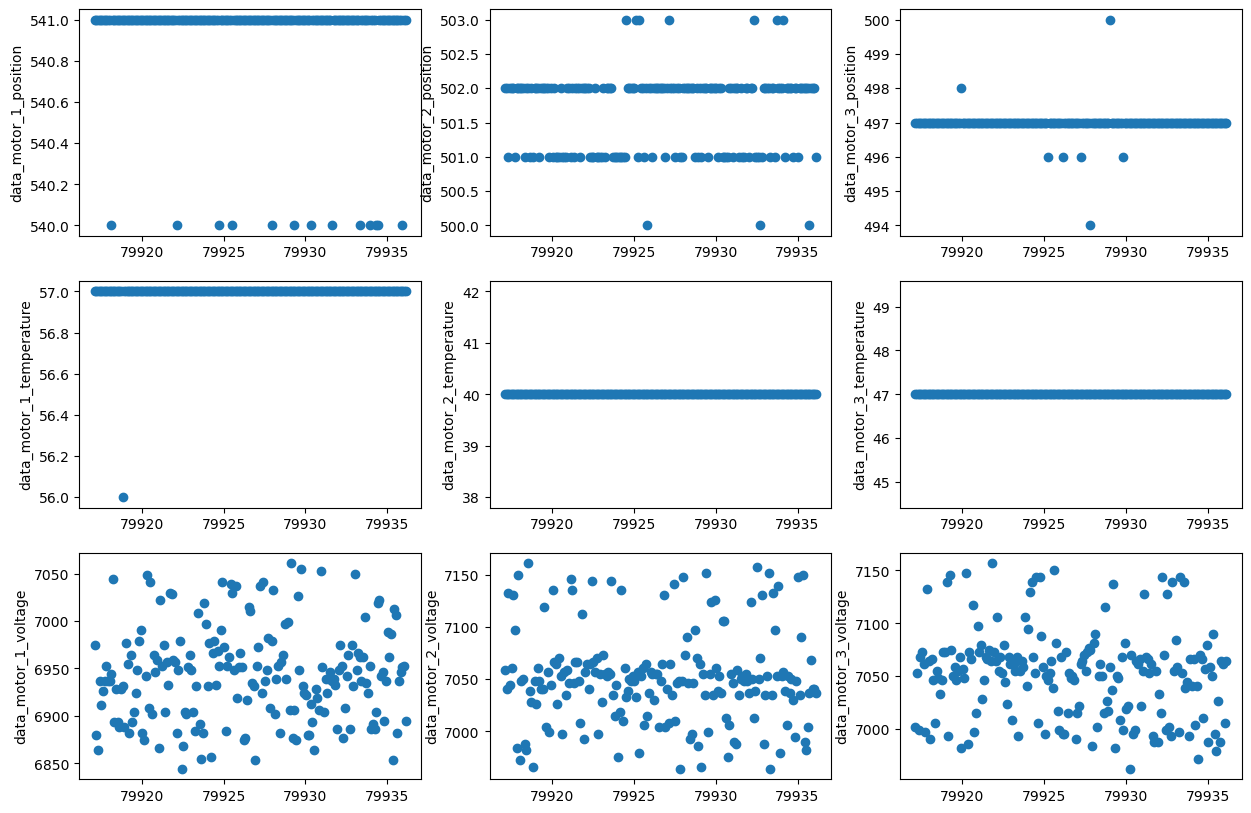

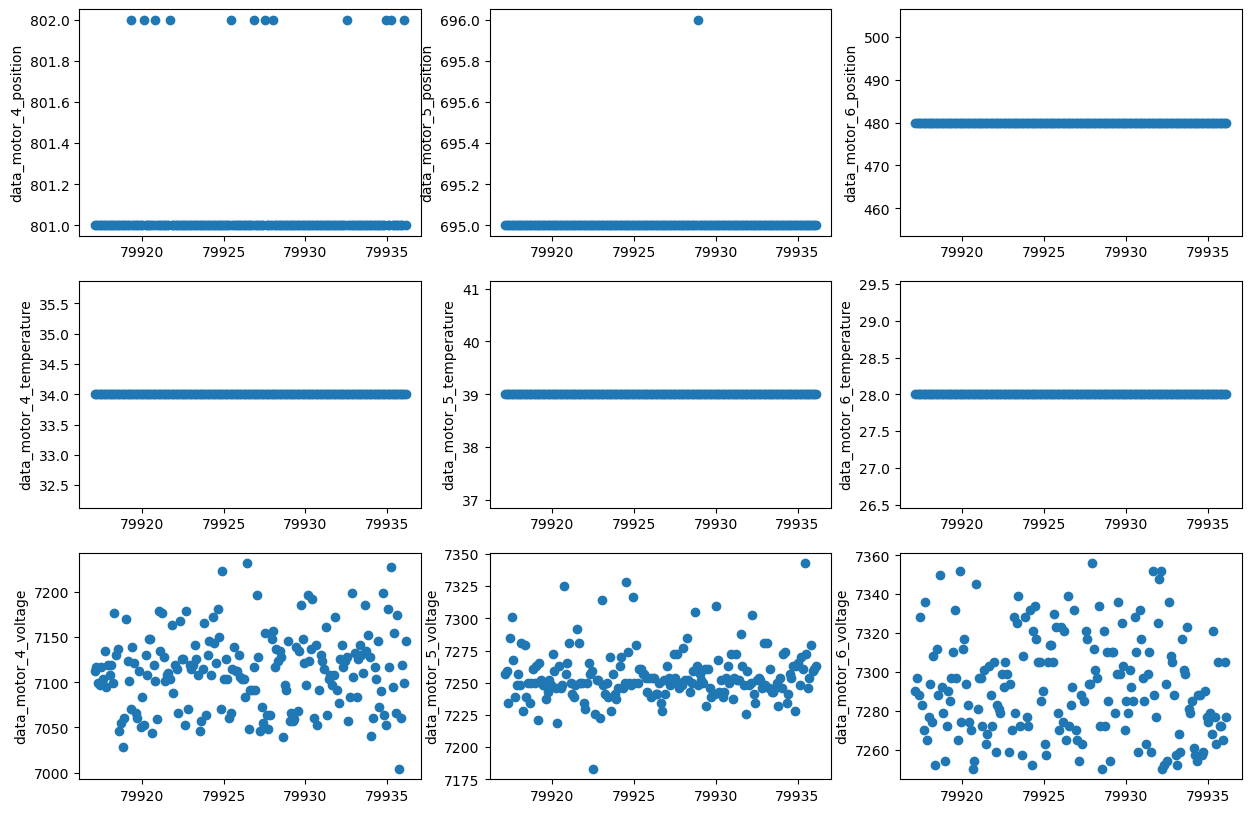

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



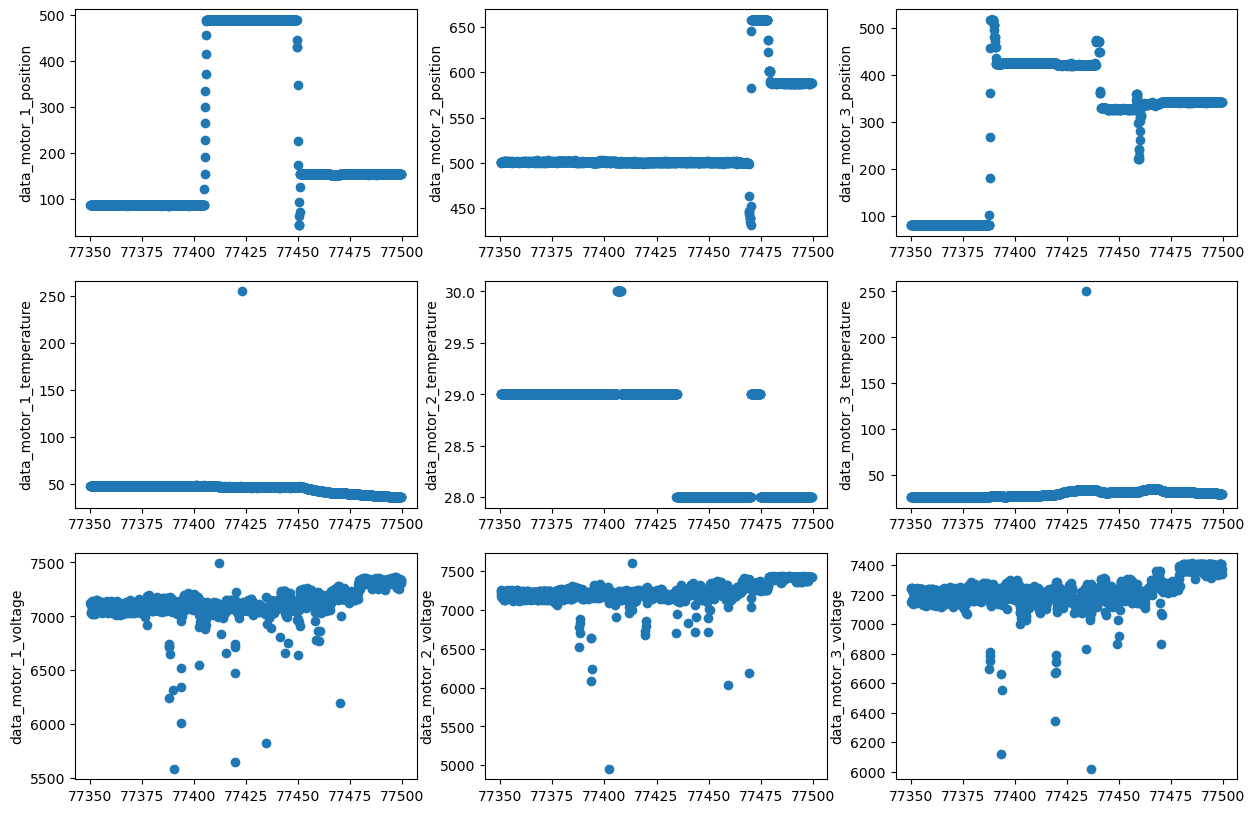

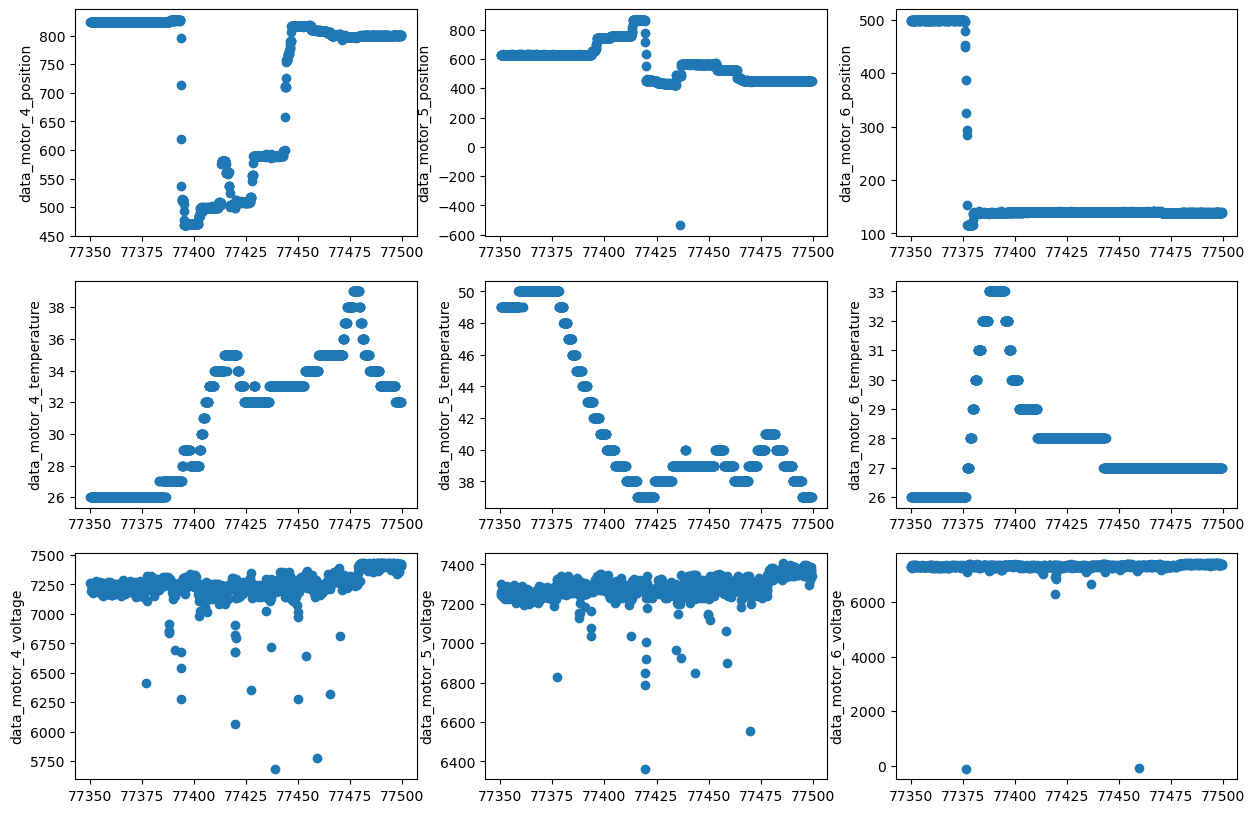

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



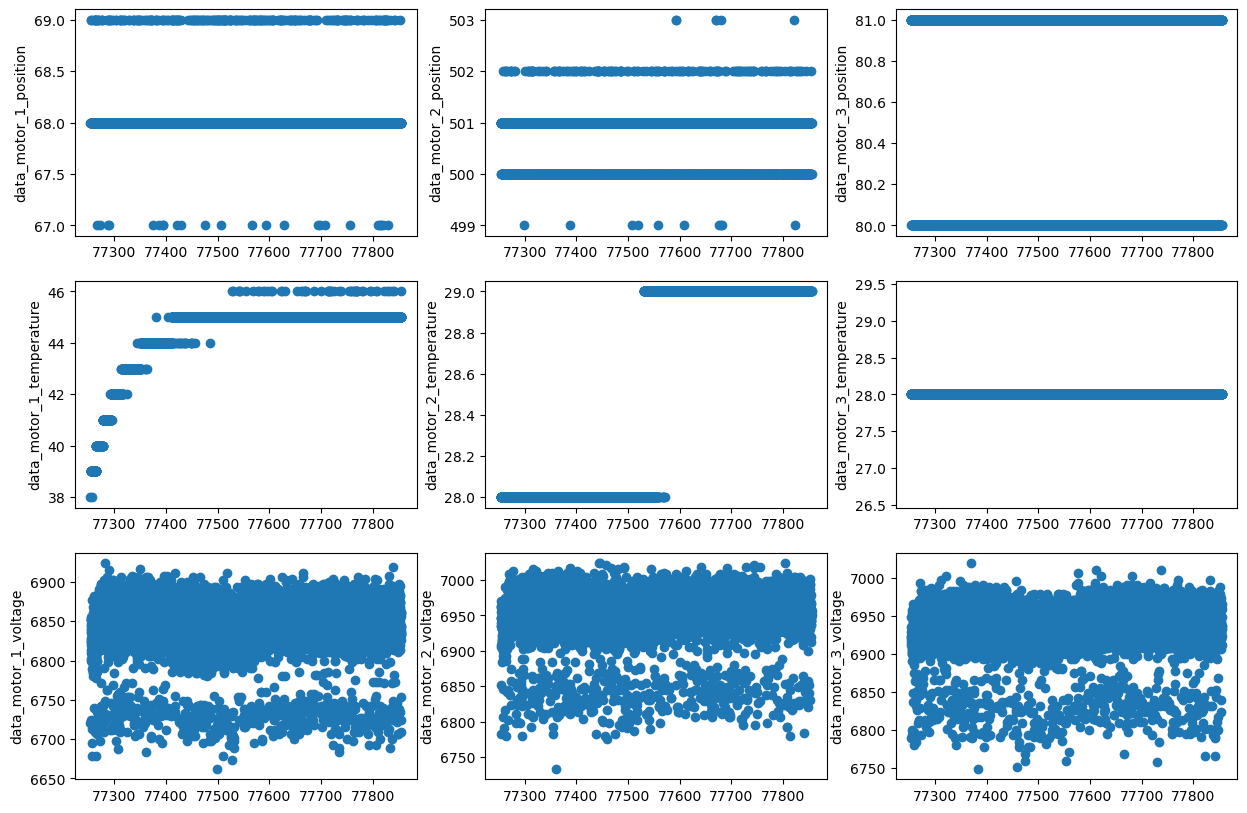

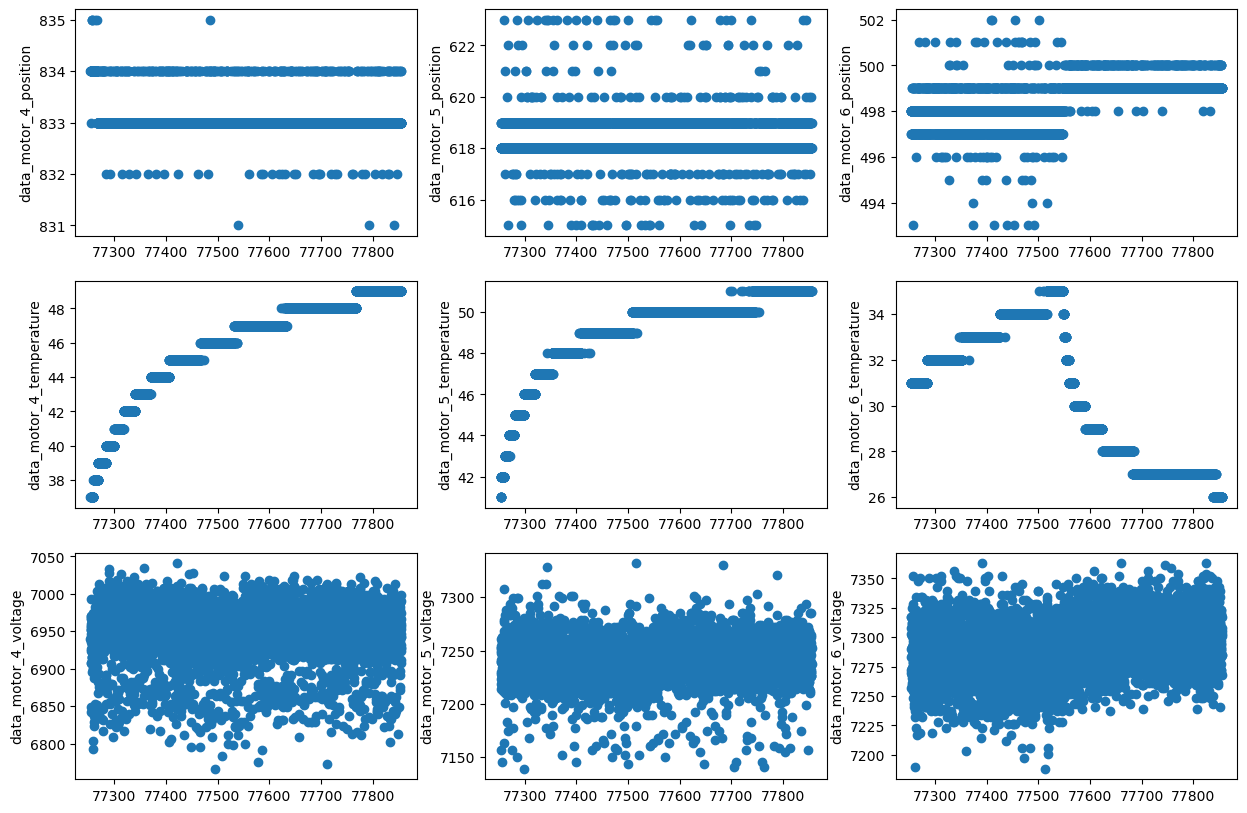

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



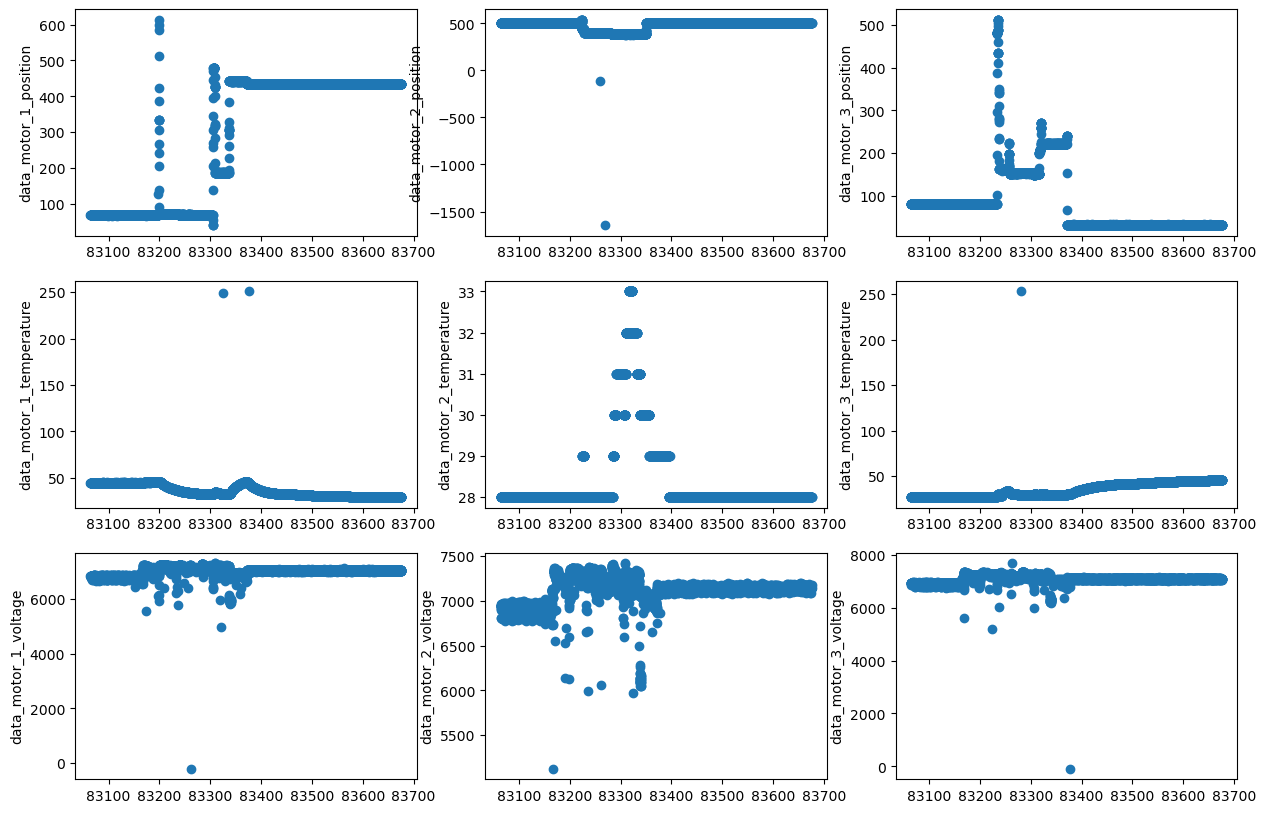

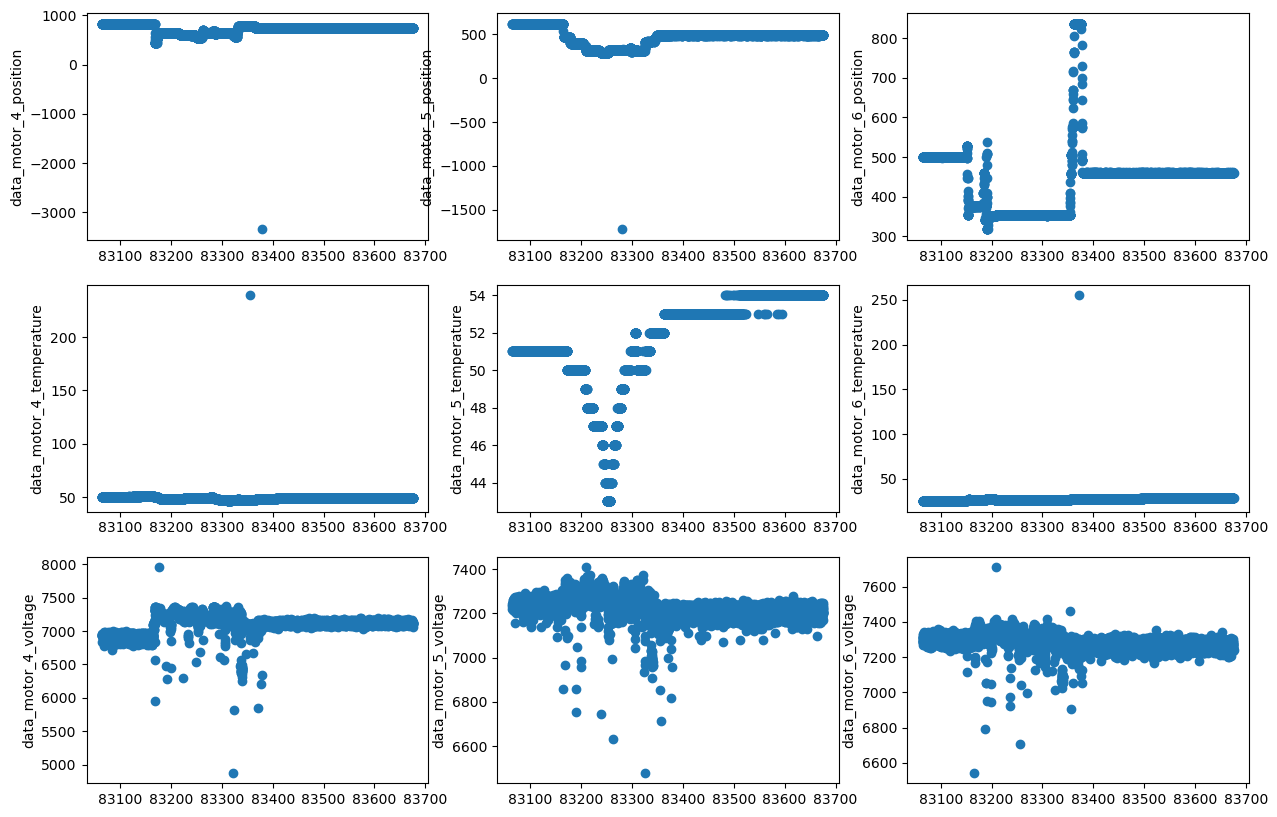

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



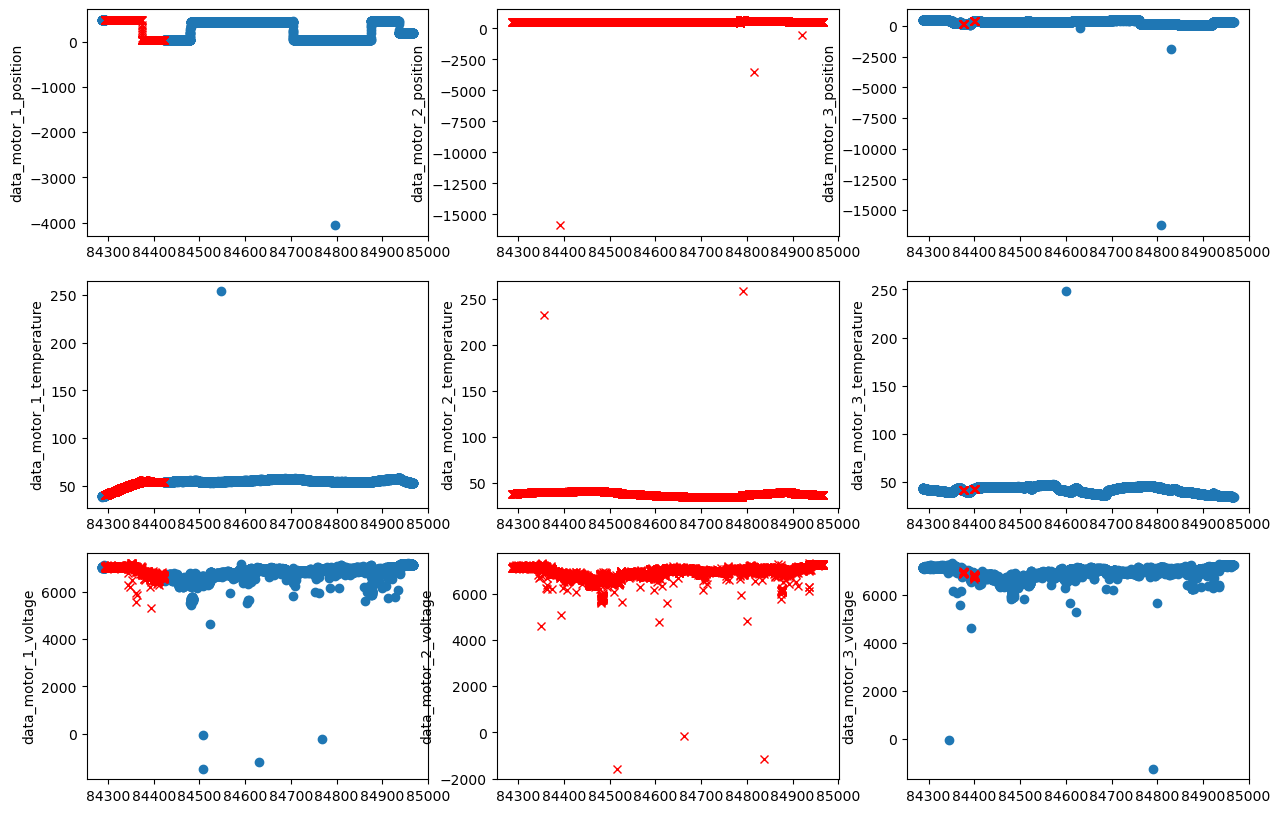

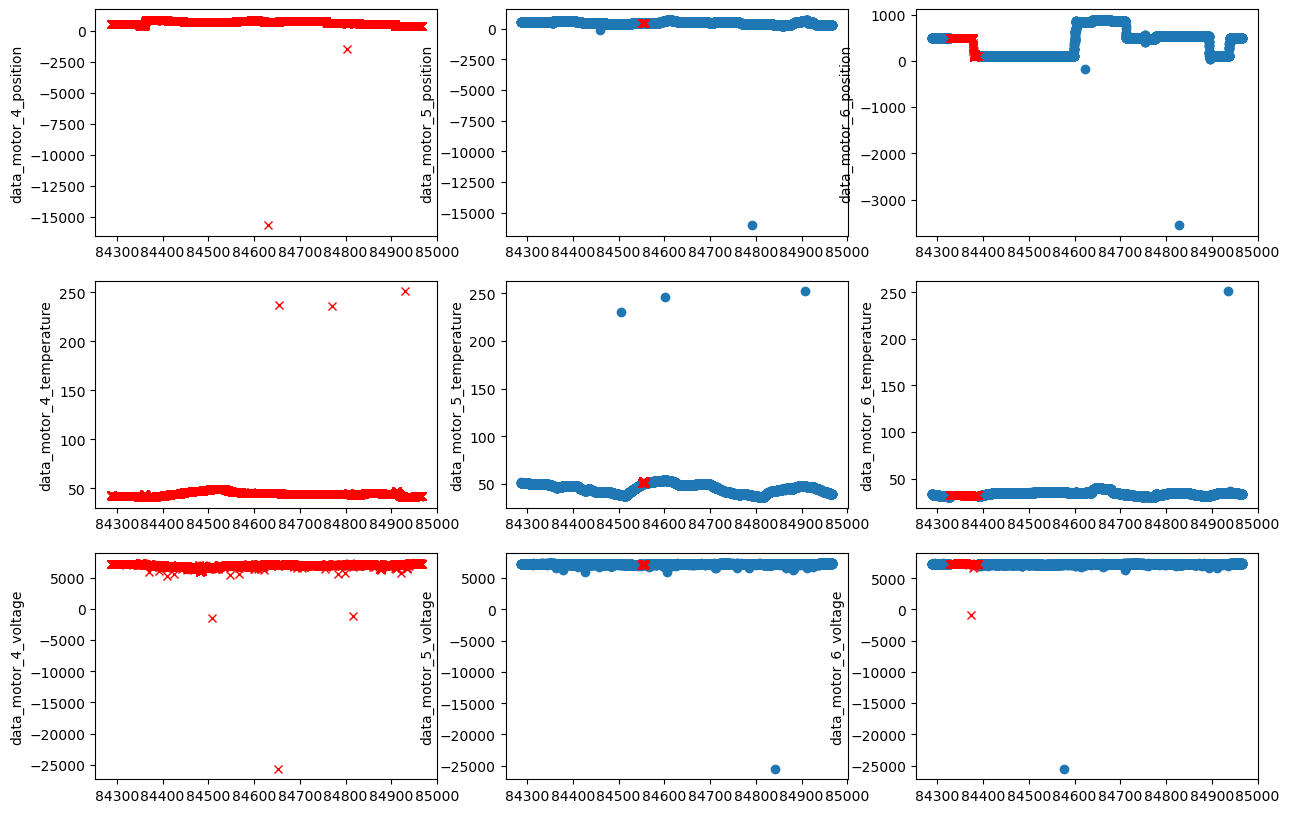

In [2]:
from utility import read_all_test_data_from_path

# Define the path to the folder 'collected_data'
base_dictionary = '../../dataset/training_data/'
# Read all the data
df_data = read_all_test_data_from_path(base_dictionary)

Each row represents a set of values collected in a timestamp. 
Each column represents a value measured by a sensor of the robot (such as tempereature, position and voltage)
The label columm represent whether the motor is faulty. 

## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

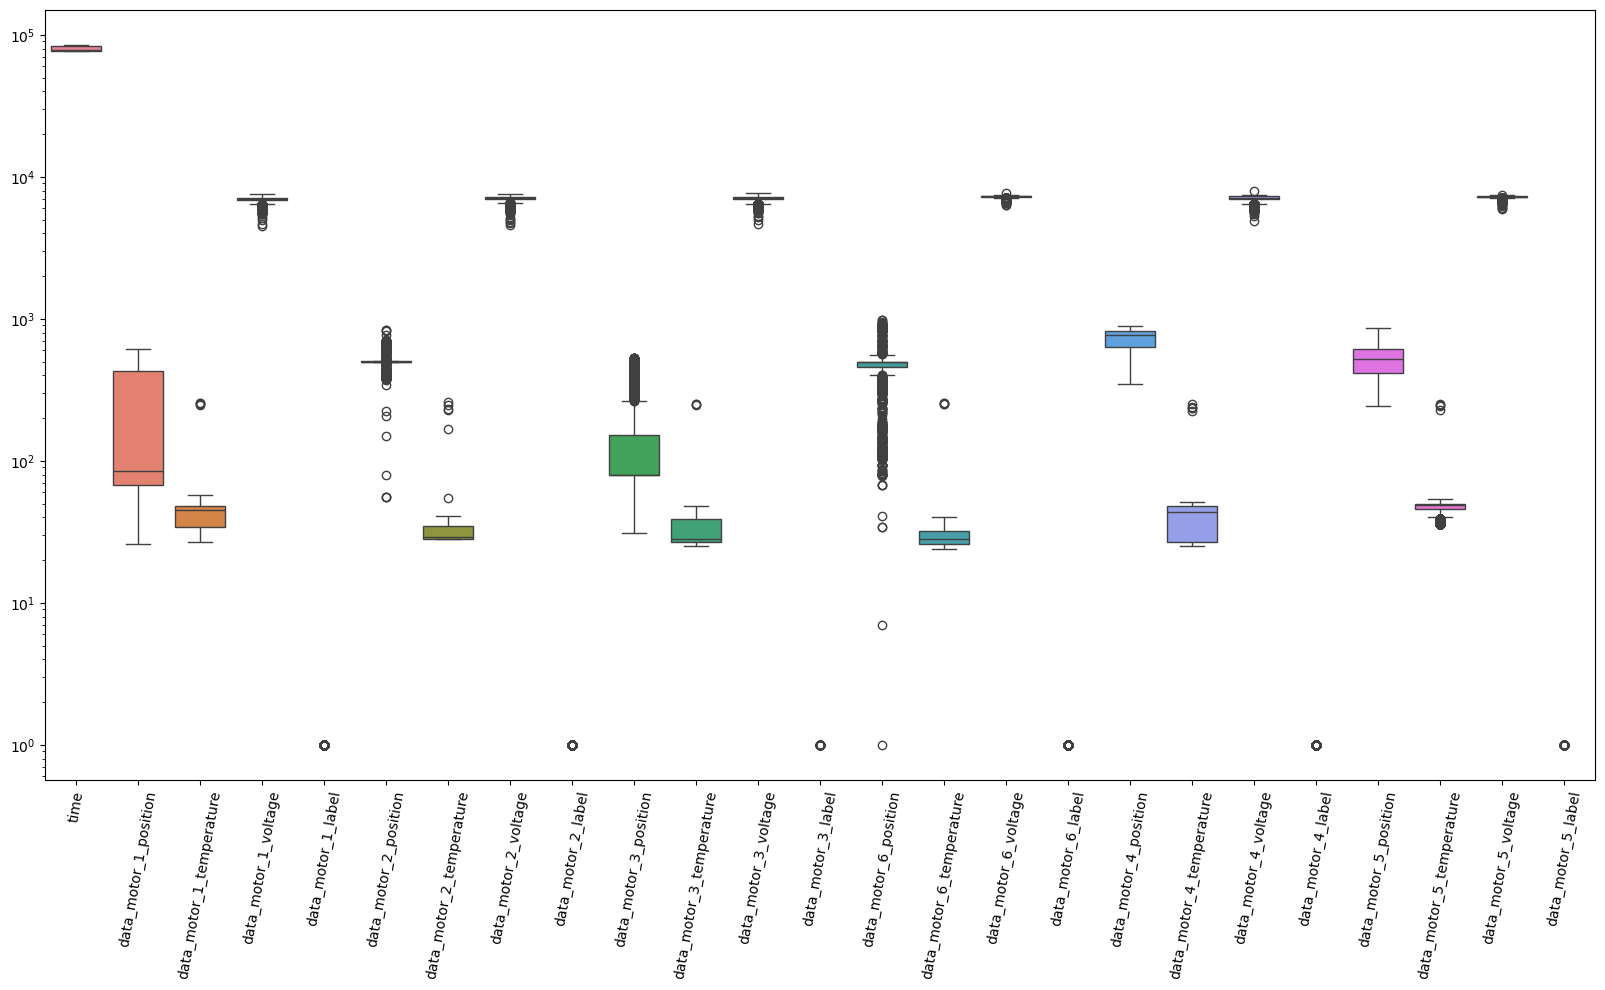

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

# features = [i for i in df_data.columns if 'position' in i]
plt.figure(figsize=(20, 10))
features = df_data.columns
sns.boxplot(data=df_data[features])
plt.xticks(rotation=80)
plt.yscale('log')

## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

['data_motor_1_label', 'data_motor_2_label', 'data_motor_3_label', 'data_motor_6_label', 'data_motor_4_label', 'data_motor_5_label']


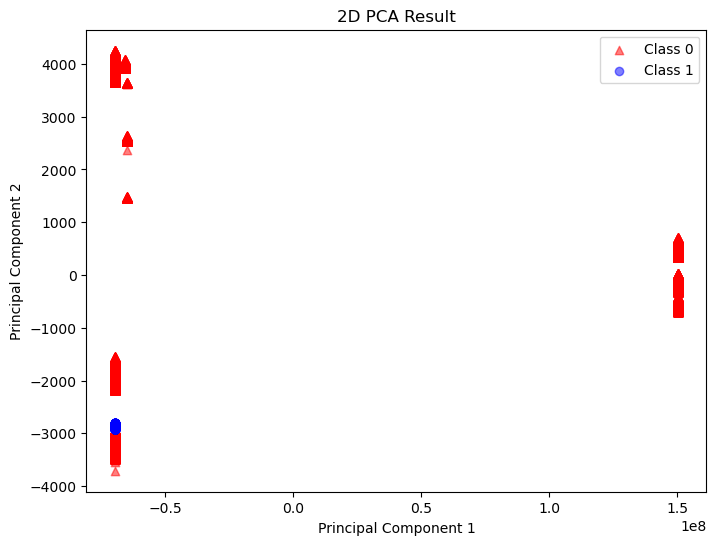

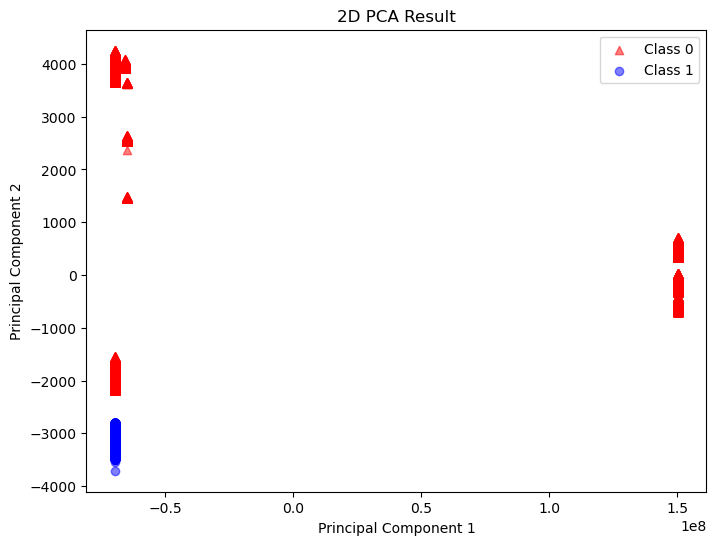

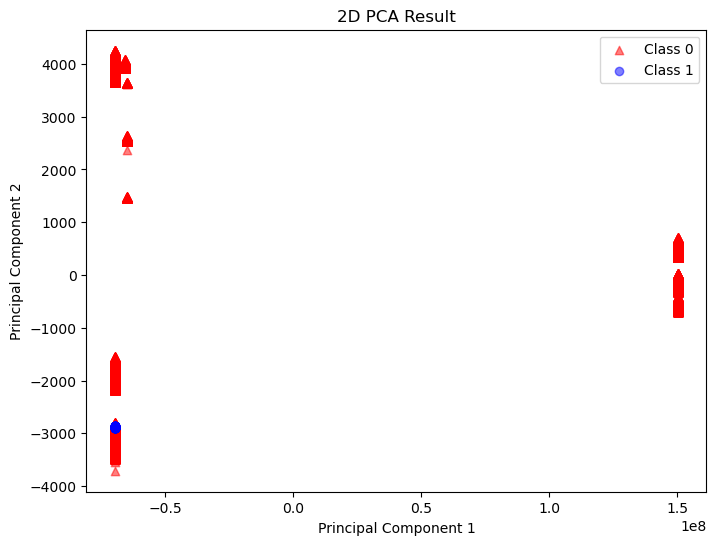

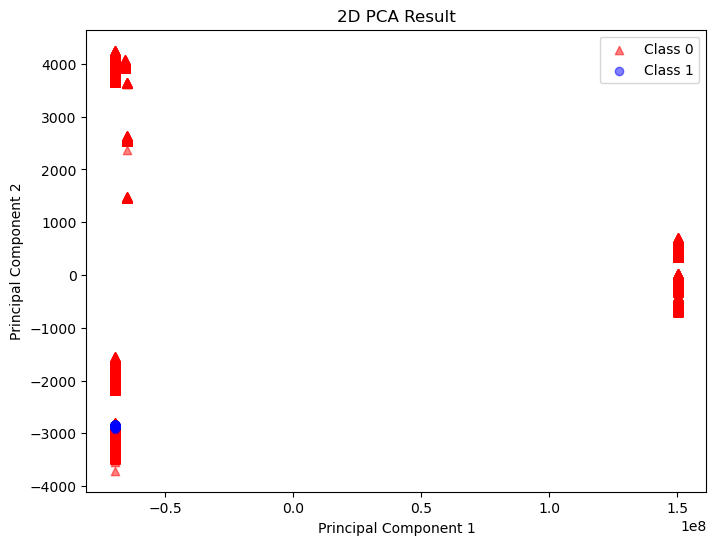

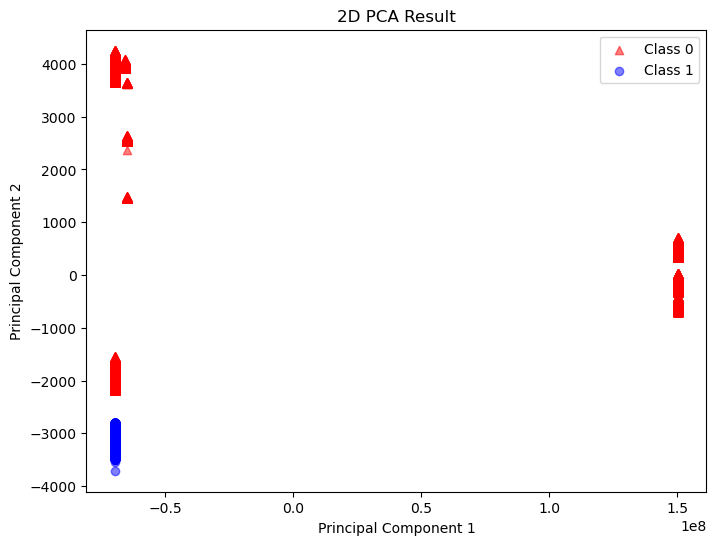

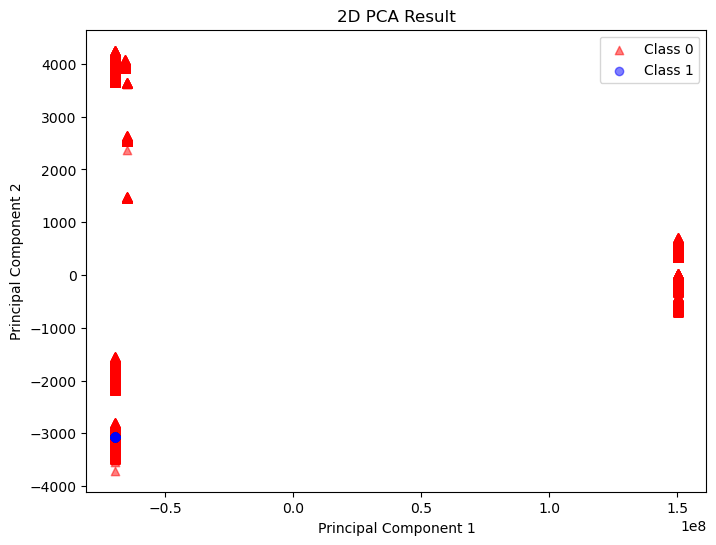

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = df_data
features = df.columns
label_col = [i for i in features if 'label' in i]
print(label_col)
# Separate the features (X) and the target variable (y)
X = df.drop(label_col, axis=1)
for label in label_col:
    y = df[label]

    # Perform PCA to reduce the dimensionality to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
    plt.title('2D PCA Result')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

From the graph, we can see when there is error (label class 1), the value of the two principal component are both very small. 

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

In [5]:
df_data

time  data_motor_1_position  data_motor_1_temperature  \
0      76522.025433                     86                        42   
1      76522.125464                     86                        42   
2      76522.225432                     86                        42   
3      76522.325432                     86                        42   
4      76522.425451                     86                        42   
...             ...                    ...                       ...   
31130  84966.426470                    195                        53   
31131  84966.526530                    195                        53   
31132  84966.626610                    195                        53   
31133  84966.726460                    195                        53   
31134  84966.826470                    195                        53   

       data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                      7223                   0                    501   
1                      7214                   0                    502   
2                      7137                   0                    501   
3                      7135                   0                    501   
4                      7212                   0                    502   
...                     ...                 ...                    ...   
31130                  7161                   0                    482   
31131                  7155                   0                    482   
31132                  7155                   0                    482   
31133                  7163                   0                    482   
31134                  7141                   0                    482   

       data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                            31                  7334                   0   
1                            31                  7250                   0   
2                            31                  7234                   0   
3                            31                  7250                   0   
4                            31                  7232                   0   
...                         ...                   ...                 ...   
31130                        36                  7265                   1   
31131                        36                  7239                   1   
31132                        36                  7246                   1   
31133                        36                  7274                   1   
31134                        36                  7261                   1   

       data_motor_3_position  ...  data_motor_6_label  data_motor_4_position  \
0                         80  ...                   0                    825   
1                         80  ...                   0                    825   
2                         79  ...                   0                    825   
3                         79  ...                   0                    825   
4                         79  ...                   0                    824   
...                      ...  ...                 ...                    ...   
31130                    327  ...                   0                    378   
31131                    328  ...                   0                    379   
31132                    328  ...                   0                    379   
31133                    328  ...                   0                    379   
31134                    328  ...                   0                    379   

       data_motor_4_temperature  data_motor_4_voltage  data_motor_4_label  \
0                            25                  7270                   0   
1                            25                  7345                   0   
2                            25                  7277                   0   
3                            25                  7263              

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'time'),
  Text(1, 0, 'data_motor_1_position'),
  Text(2, 0, 'data_motor_1_temperature'),
  Text(3, 0, 'data_motor_1_voltage'),
  Text(4, 0, 'data_motor_1_label'),
  Text(5, 0, 'data_motor_2_position'),
  Text(6, 0, 'data_motor_2_temperature'),
  Text(7, 0, 'data_motor_2_voltage'),
  Text(8, 0, 'data_motor_2_label'),
  Text(9, 0, 'data_motor_3_position'),
  Text(10, 0, 'data_motor_3_temperature'),
  Text(11, 0, 'data_motor_3_voltage'),
  Text(12, 0, 'data_motor_3_label'),
  Text(13, 0, 'data_motor_6_position'),
  Text(14, 0, 'data_motor_6_temperature'),
  Text(15, 0, 'data_motor_6_voltage'),
  Text(16, 0, 'data_motor_6_label'),
  Text(17, 0, 'data_motor_4_position'),
  Text(18, 0, 'data_motor_4_temperature'),
  Text(19, 0, 'data_motor_4_voltage'),
  Text(20, 0, 'data_motor_4_label'),
  Text(21, 0, 'data_motor_5_position'),
  Text(22, 0, 'data_motor_5_te

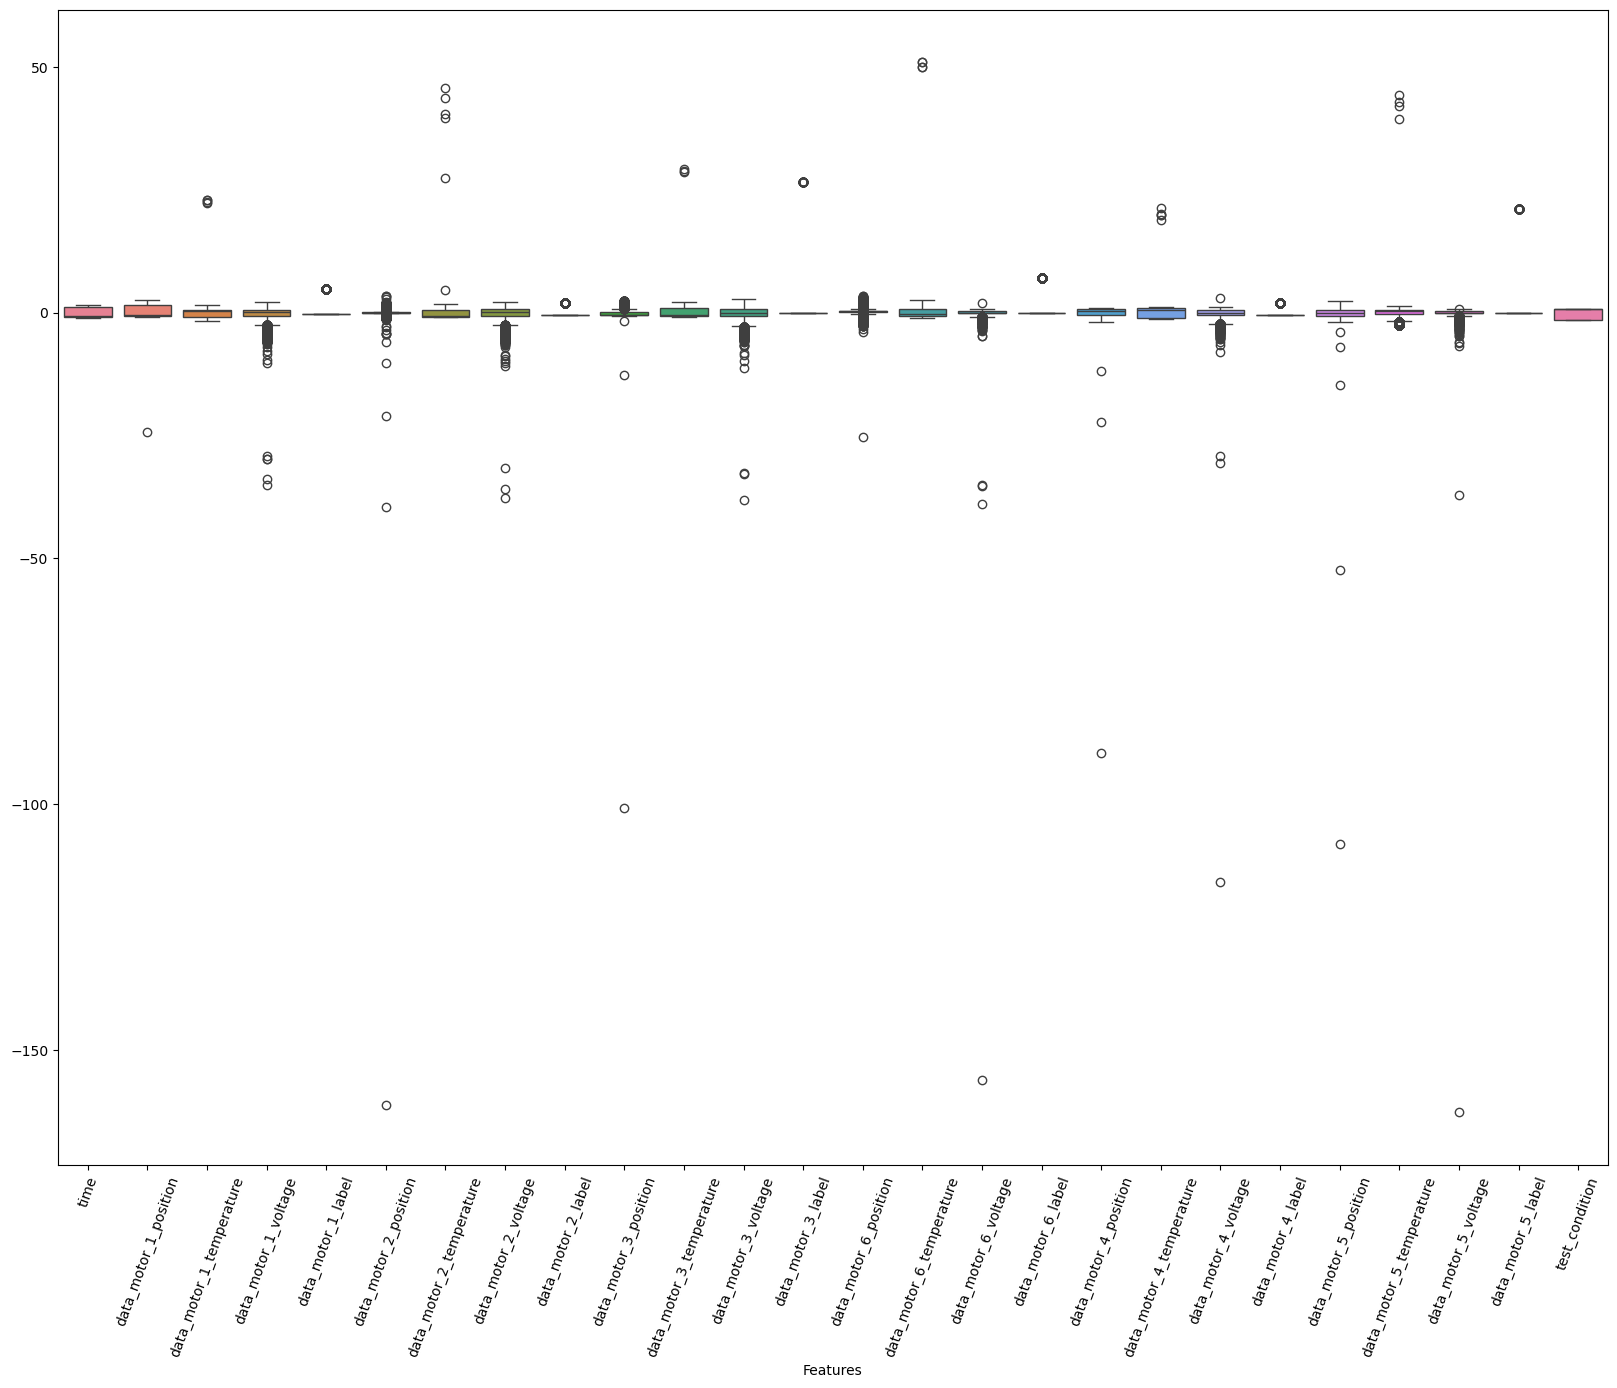

In [6]:
# Stamdardazation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = df_data[features]
X_train = scaler.fit_transform(X_train)

plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train)
# add x axis label names to the plot from features
plt.xticks(ticks=range(len(features)), labels=features)
plt.xlabel('Features')
plt.xticks(rotation=70)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'time'),
  Text(1, 0, 'data_motor_1_position'),
  Text(2, 0, 'data_motor_1_temperature'),
  Text(3, 0, 'data_motor_1_voltage'),
  Text(4, 0, 'data_motor_1_label'),
  Text(5, 0, 'data_motor_2_position'),
  Text(6, 0, 'data_motor_2_temperature'),
  Text(7, 0, 'data_motor_2_voltage'),
  Text(8, 0, 'data_motor_2_label'),
  Text(9, 0, 'data_motor_3_position'),
  Text(10, 0, 'data_motor_3_temperature'),
  Text(11, 0, 'data_motor_3_voltage'),
  Text(12, 0, 'data_motor_3_label'),
  Text(13, 0, 'data_motor_6_position'),
  Text(14, 0, 'data_motor_6_temperature'),
  Text(15, 0, 'data_motor_6_voltage'),
  Text(16, 0, 'data_motor_6_label'),
  Text(17, 0, 'data_motor_4_position'),
  Text(18, 0, 'data_motor_4_temperature'),
  Text(19, 0, 'data_motor_4_voltage'),
  Text(20, 0, 'data_motor_4_label'),
  Text(21, 0, 'data_motor_5_position'),
  Text(22, 0, 'data_motor_5_te

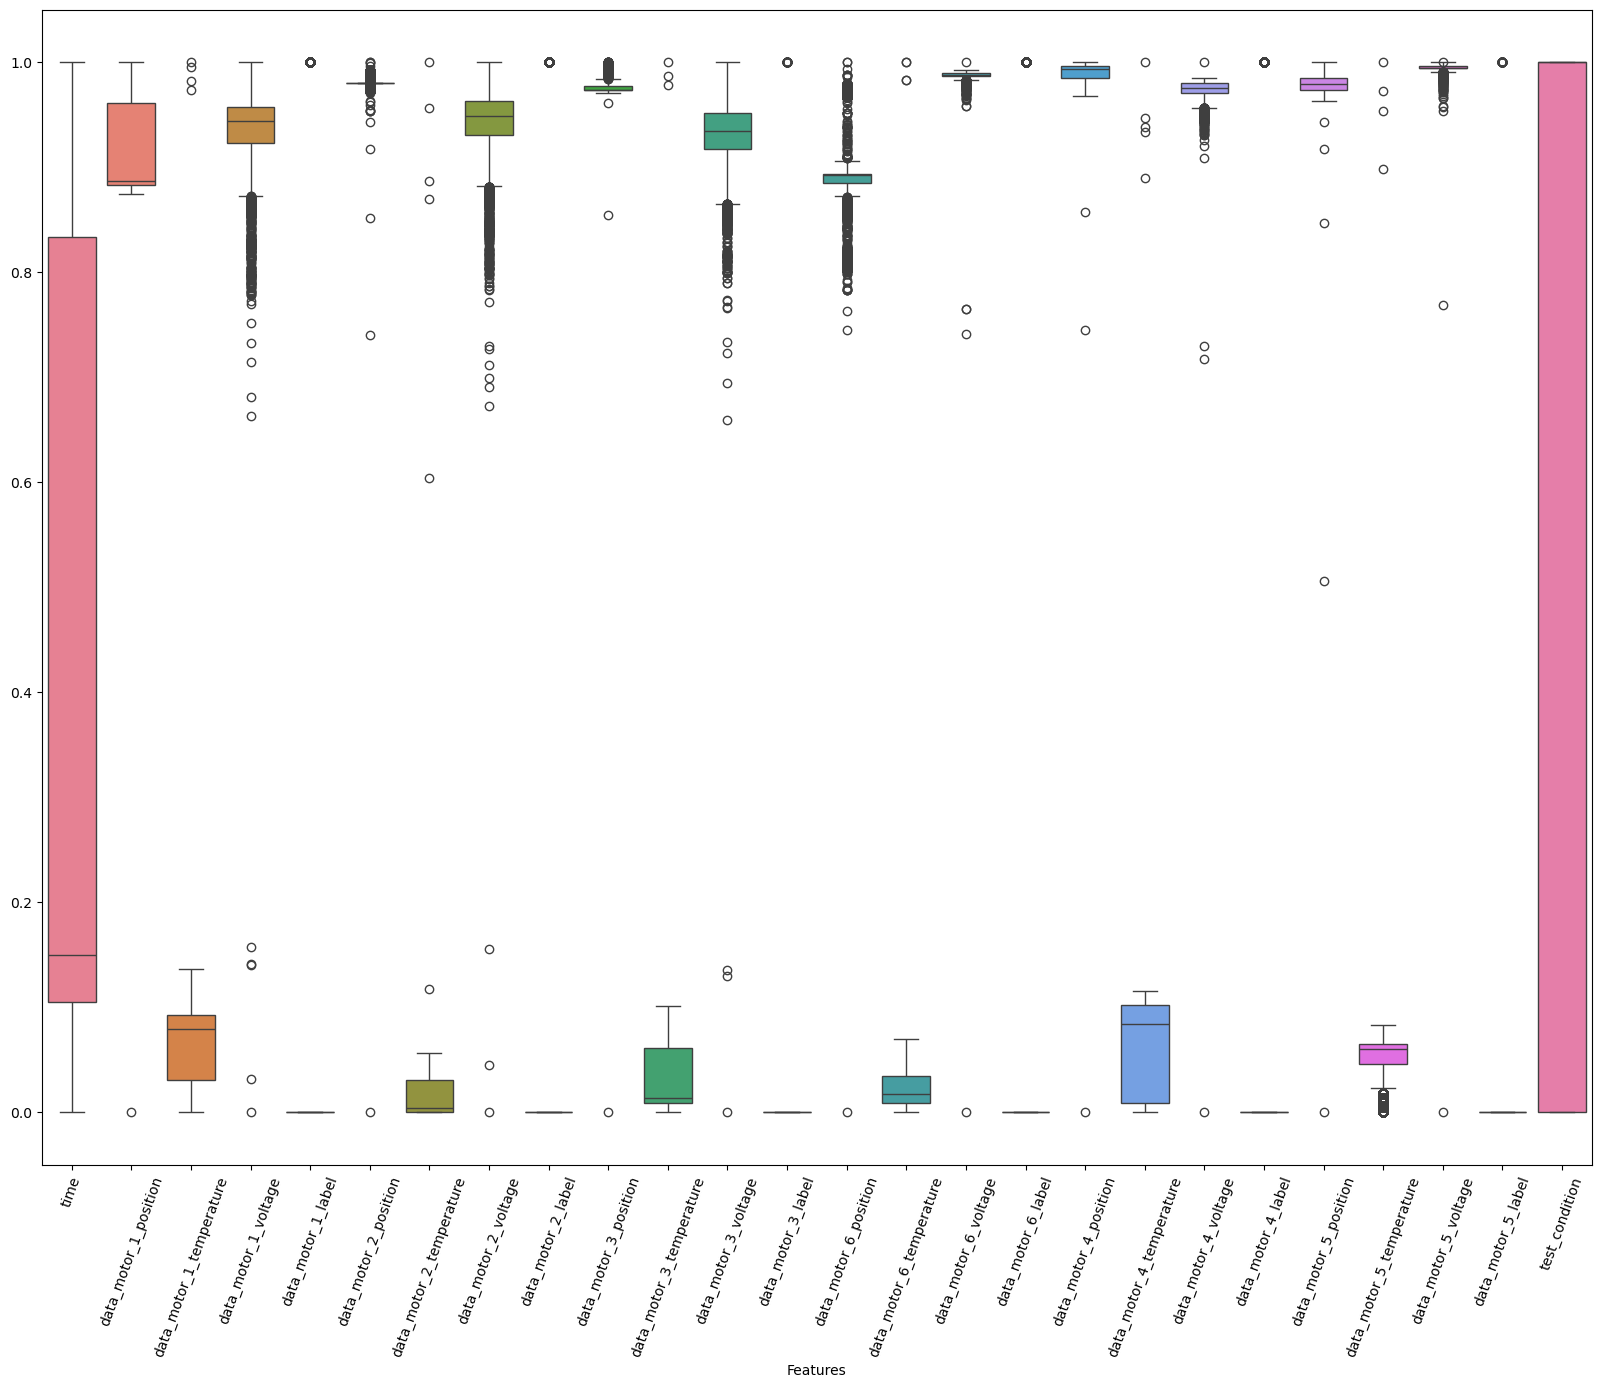

In [7]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = df_data[features]
X_train = scaler.fit_transform(X_train)

plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train)
plt.xticks(ticks=range(len(features)), labels=features)
plt.xlabel('Features')
plt.xticks(rotation=70)

# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

### We believe we should remove the abnormal data points before we normalize the data. You can find the code for normalization after Task 2. 

In [8]:
features = df_data.columns
label_col = [i for i in features if 'label' in i]
X_train = df_data.drop(label_col+['test_condition'], axis=1)
y = df_data[label_col]

X_train


time  data_motor_1_position  data_motor_1_temperature  \
0      76522.025433                     86                        42   
1      76522.125464                     86                        42   
2      76522.225432                     86                        42   
3      76522.325432                     86                        42   
4      76522.425451                     86                        42   
...             ...                    ...                       ...   
31130  84966.426470                    195                        53   
31131  84966.526530                    195                        53   
31132  84966.626610                    195                        53   
31133  84966.726460                    195                        53   
31134  84966.826470                    195                        53   

       data_motor_1_voltage  data_motor_2_position  data_motor_2_temperature  \
0                      7223                    501                        31   
1                      7214                    502                        31   
2                      7137                    501                        31   
3                      7135                    501                        31   
4                      7212                    502                        31   
...                     ...                    ...                       ...   
31130                  7161                    482                        36   
31131                  7155                    482                        36   
31132                  7155                    482                        36   
31133                  7163                    482                        36   
31134                  7141                    482                        36   

       data_motor_2_voltage  data_motor_3_position  data_motor_3_temperature  \
0                      7334                     80                        25   
1                      7250                     80                        25   
2                      7234                     79                        25   
3                      7250                     79                        25   
4                      7232                     79                        25   
...                     ...                    ...                       ...   
31130                  7265                    327                        34   
31131                  7239                    328                        34   
31132                  7246                    328                        34   
31133                  7274                    328                        34   
31134                  7261                    328                        34   

       data_motor_3_voltage  data_motor_6_position  data_motor_6_temperature  \
0                      7257                    500                        24   
1                      7250                    499                        24   
2                      7257                    499                        24   
3                      7270                    499                        24   
4                      7241                    499                        24   
...                     ...                    ...                       ...   
31130                  7234                    494                        33   
31131                  7226                    494                        33   
31132                  7237                    495                        33   
31133                  7228                    495                        33   
31134                  7232                    495                        33   

       data_motor_6_voltage  data_motor_4_position  data_motor_4_temperature  \
0                      7361                    825                        25   
1                      7372                    825                        25   
2                      7356

## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

In [9]:
import numpy as np

def remove_outliers(df: pd.DataFrame):
    ''' # Description
    Remove outliers from the dataframe based on defined valid ranges. 
    Define a valid range of temperature and voltage. 
    Use ffil function to replace the invalid measurement with the previous value.
    '''

    for i in range(1, 7):
        feat_temp = 'data_motor_'+str(i)+'_temperature'
        df[feat_temp] = df[feat_temp].where(df[feat_temp] <= 200, np.nan)
        df[feat_temp] = df[feat_temp].where(df[feat_temp] >= 0, np.nan)
        df[feat_temp] = df[feat_temp].ffill()

        feat_volt = 'data_motor_'+str(i)+'_voltage'
        df[feat_volt] = df[feat_volt].where(df[feat_volt] >= 6000, np.nan)
        df[feat_volt] = df[feat_volt].where(df[feat_volt] <= 9000, np.nan)
        df[feat_volt] = df[feat_volt].ffill()

        feat_pos = 'data_motor_'+str(i)+'_position'
        df[feat_pos] = df[feat_pos].where(df[feat_pos] >= 0, np.nan)
        df[feat_pos] = df[feat_pos].where(df[feat_pos] <= 1000, np.nan)
        df[feat_pos] = df[feat_pos].ffill()

    return df

X_train = remove_outliers(X_train)
# sns.boxplot(data=X_train.drop(['time'], axis=1))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'data_motor_1_position'),
  Text(1, 0, 'data_motor_1_temperature'),
  Text(2, 0, 'data_motor_1_voltage'),
  Text(3, 0, 'data_motor_2_position'),
  Text(4, 0, 'data_motor_2_temperature'),
  Text(5, 0, 'data_motor_2_voltage'),
  Text(6, 0, 'data_motor_3_position'),
  Text(7, 0, 'data_motor_3_temperature'),
  Text(8, 0, 'data_motor_3_voltage'),
  Text(9, 0, 'data_motor_6_position'),
  Text(10, 0, 'data_motor_6_temperature'),
  Text(11, 0, 'data_motor_6_voltage'),
  Text(12, 0, 'data_motor_4_position'),
  Text(13, 0, 'data_motor_4_temperature'),
  Text(14, 0, 'data_motor_4_voltage'),
  Text(15, 0, 'data_motor_5_position'),
  Text(16, 0, 'data_motor_5_temperature'),
  Text(17, 0, 'data_motor_5_voltage')])

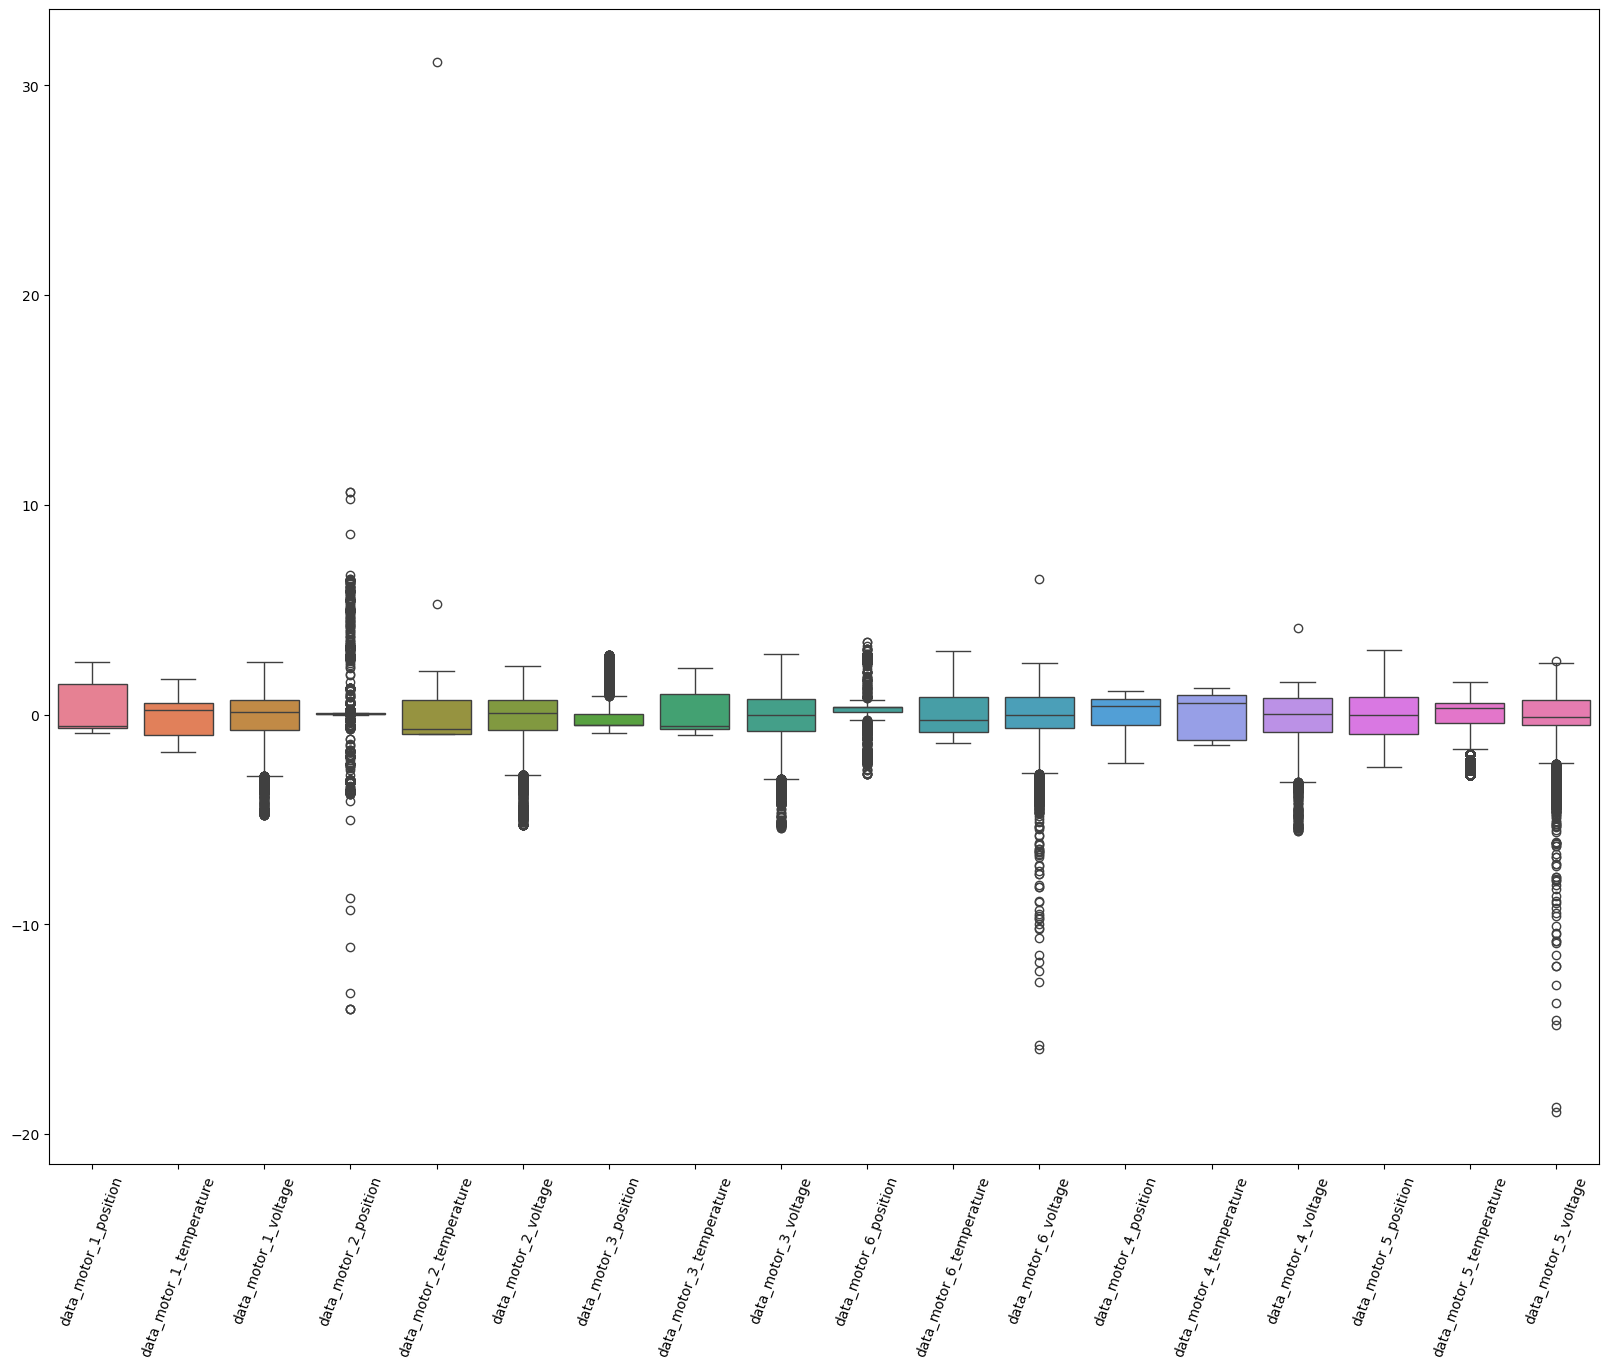

In [10]:
# Stamdardazation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
time = X_train[['time']]
X_train_std = X_train.drop('time', axis=1)
features = X_train_std.columns
X_train_std = scaler.fit_transform(X_train_std)
X_train_std = pd.DataFrame(X_train_std, columns=features)

# join the time feature 
# X_train_std = pd.concat([time, X_train_std])
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train_std)
plt.xticks(rotation=70)

## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

We use the method of moving average to smooth the data, with window size being 10

In [11]:
import pandas as pd

window_size = 10
smoothed_data = X_train_std.apply(lambda x: x.rolling(window=window_size, min_periods=1).mean(), axis=0)

sns.lineplot(data=smoothed_data['data_motor_1_temperature'])

<Axes: ylabel='data_motor_1_temperature'>

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

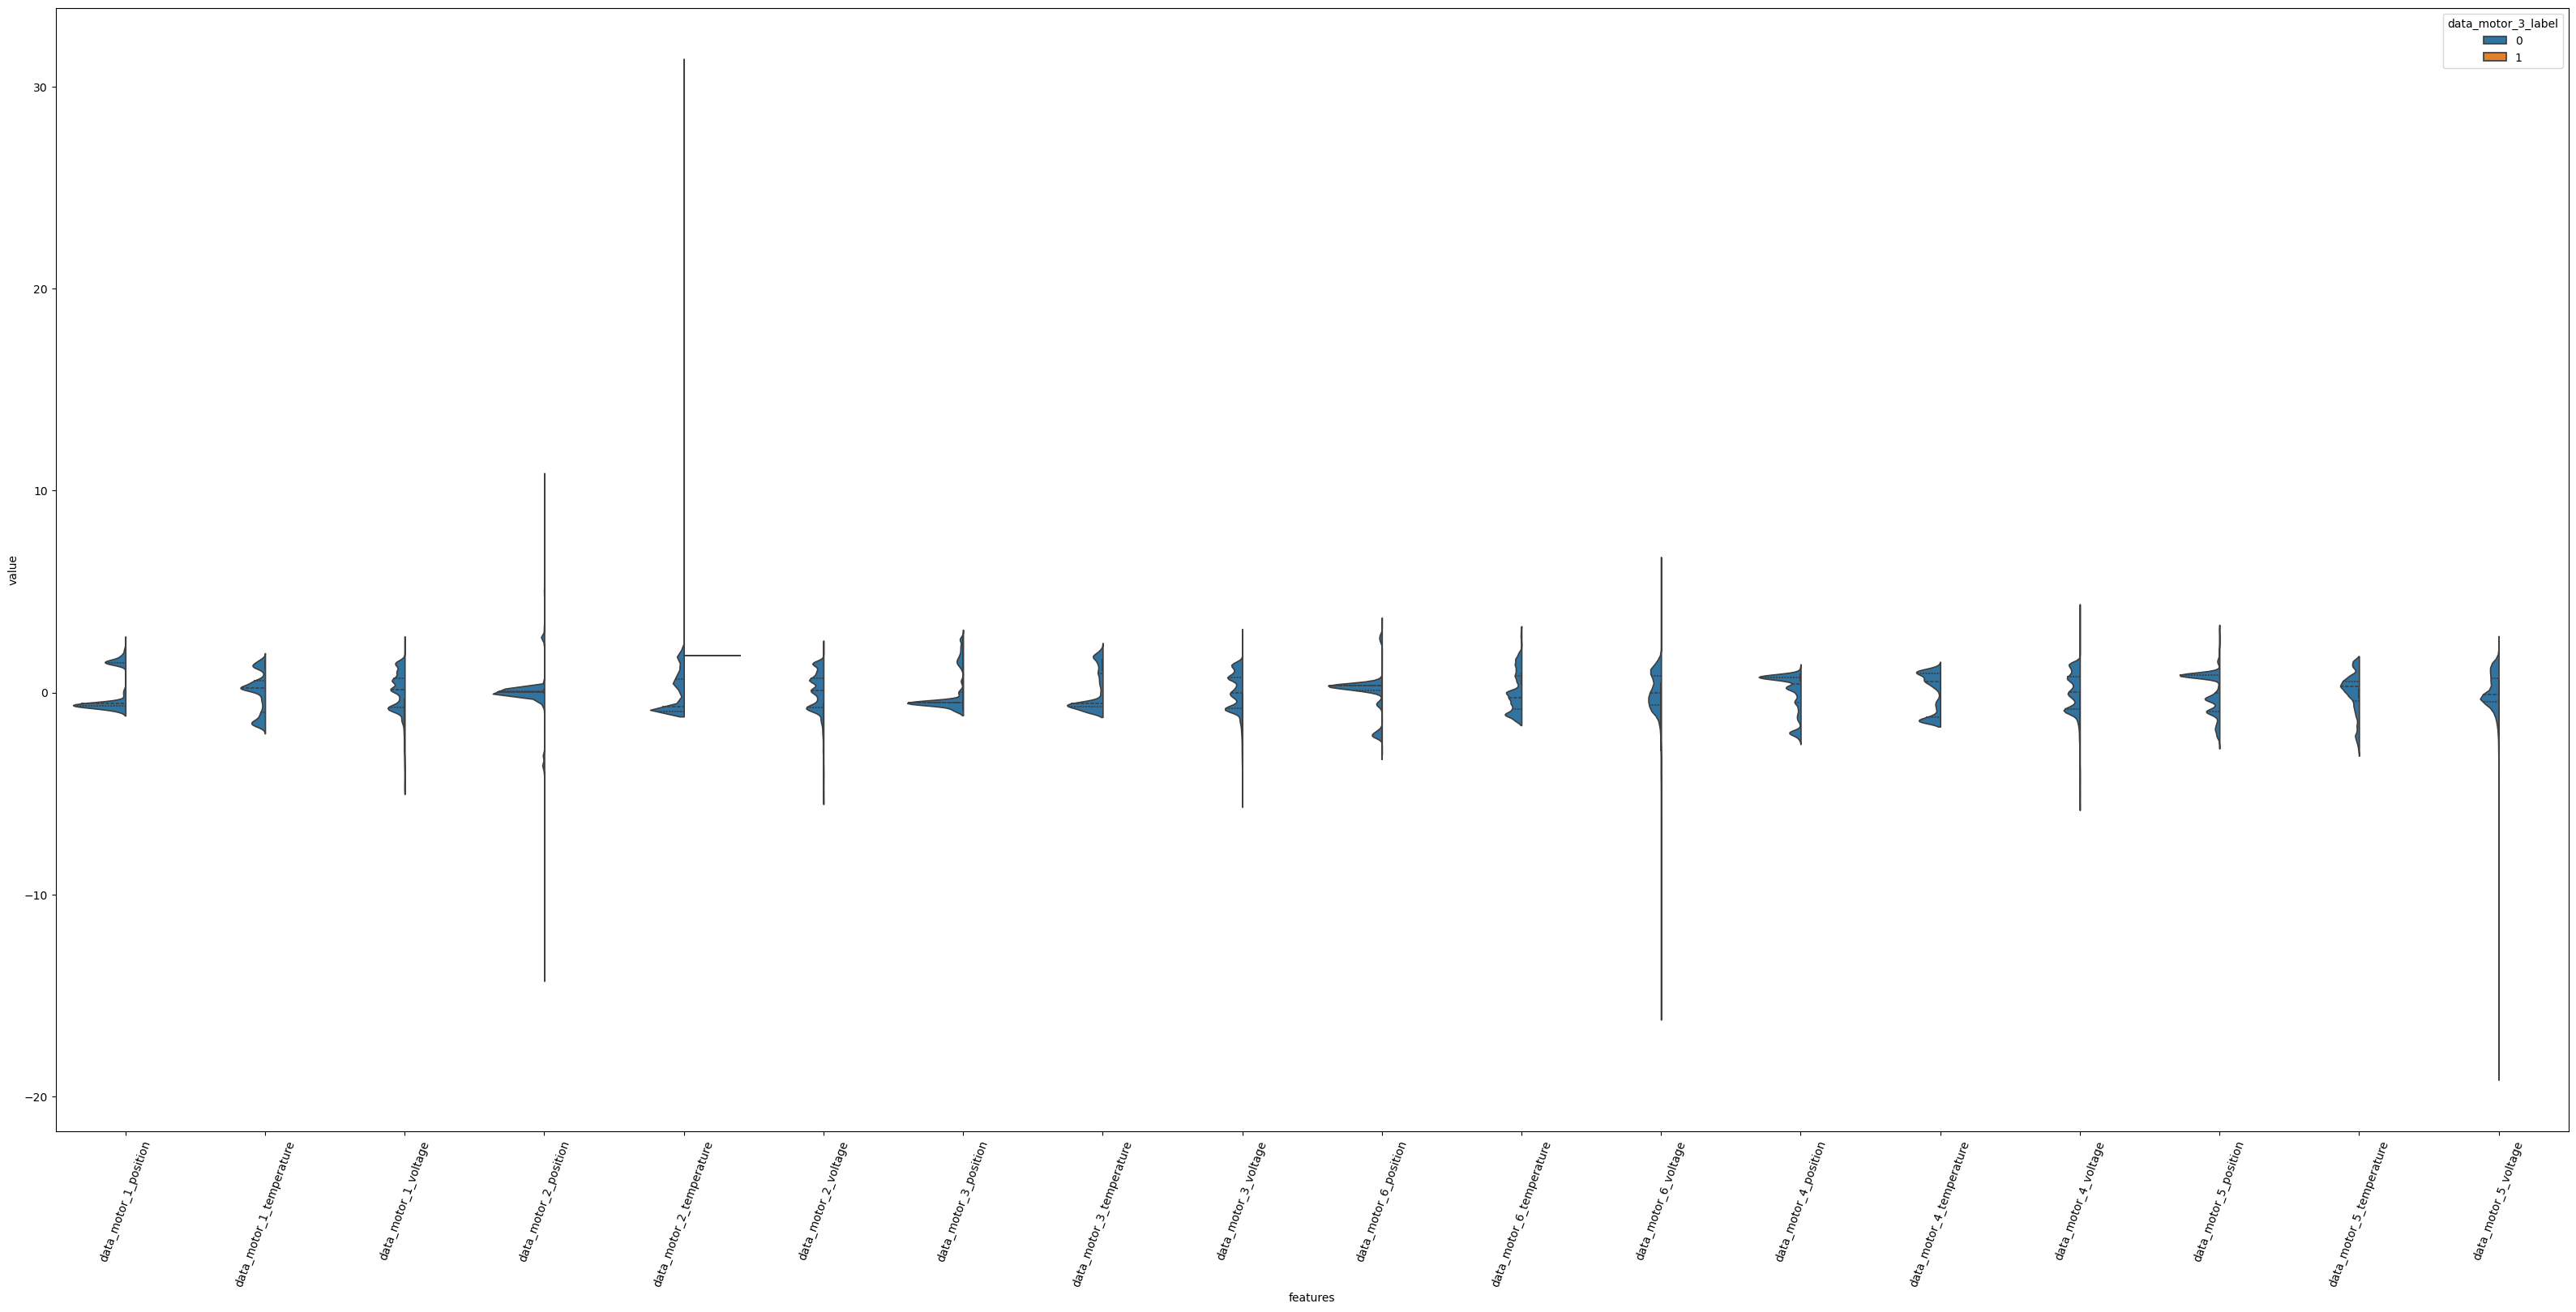

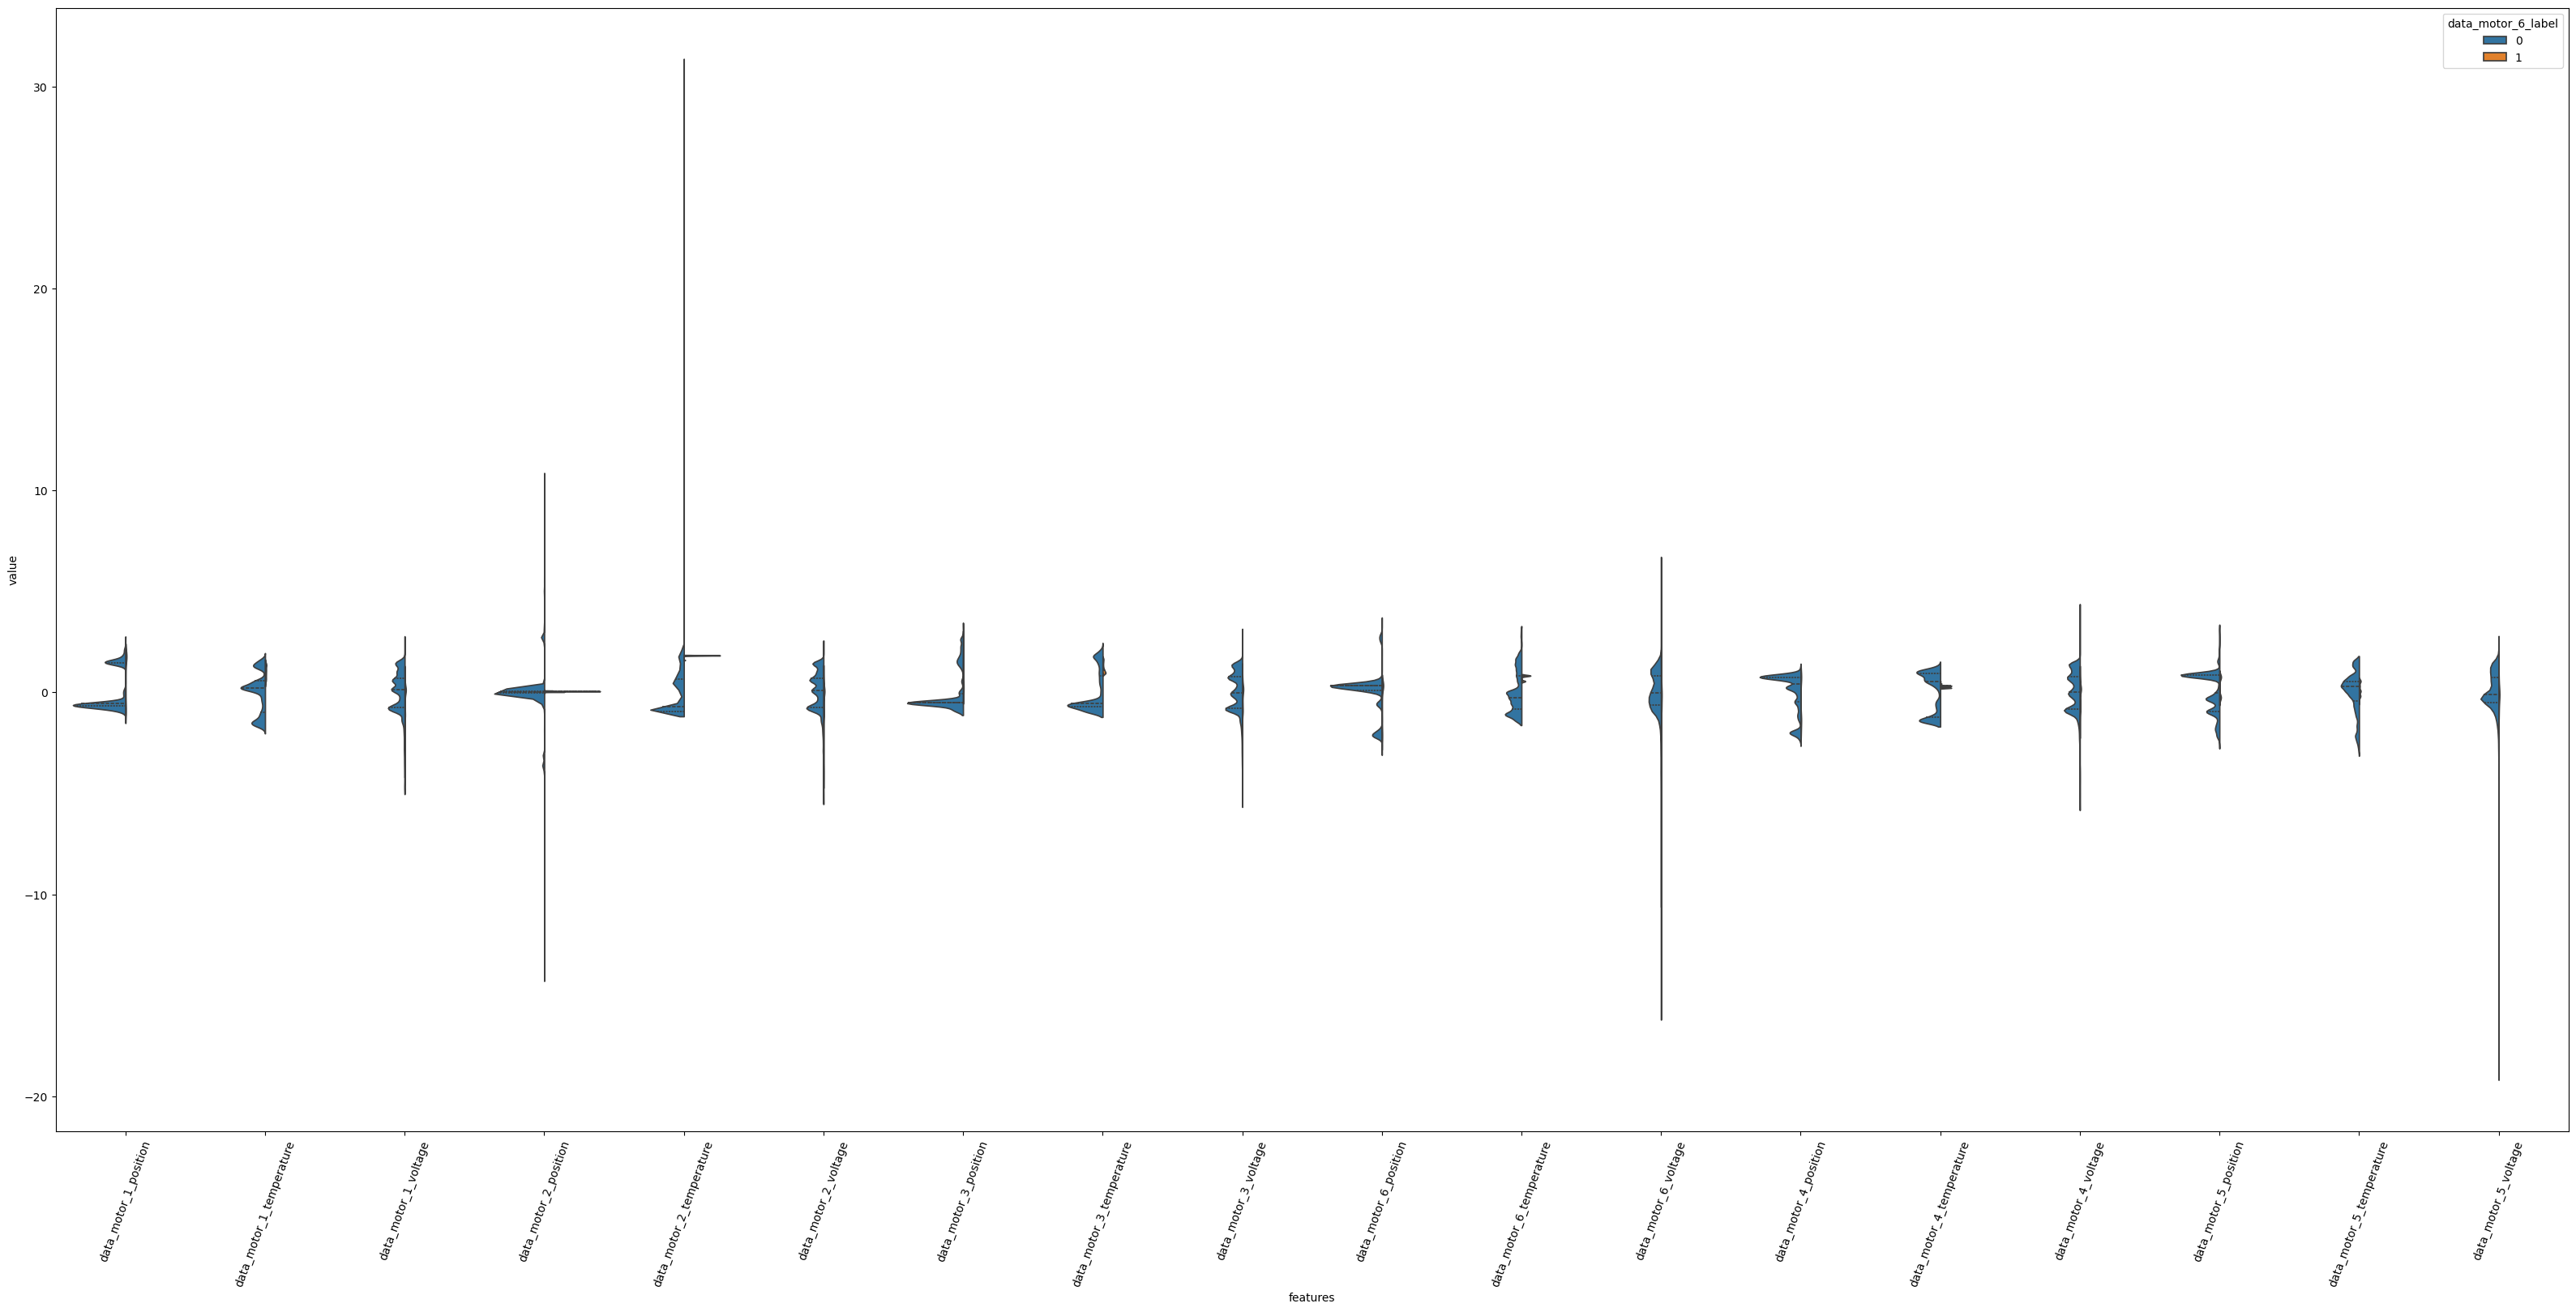

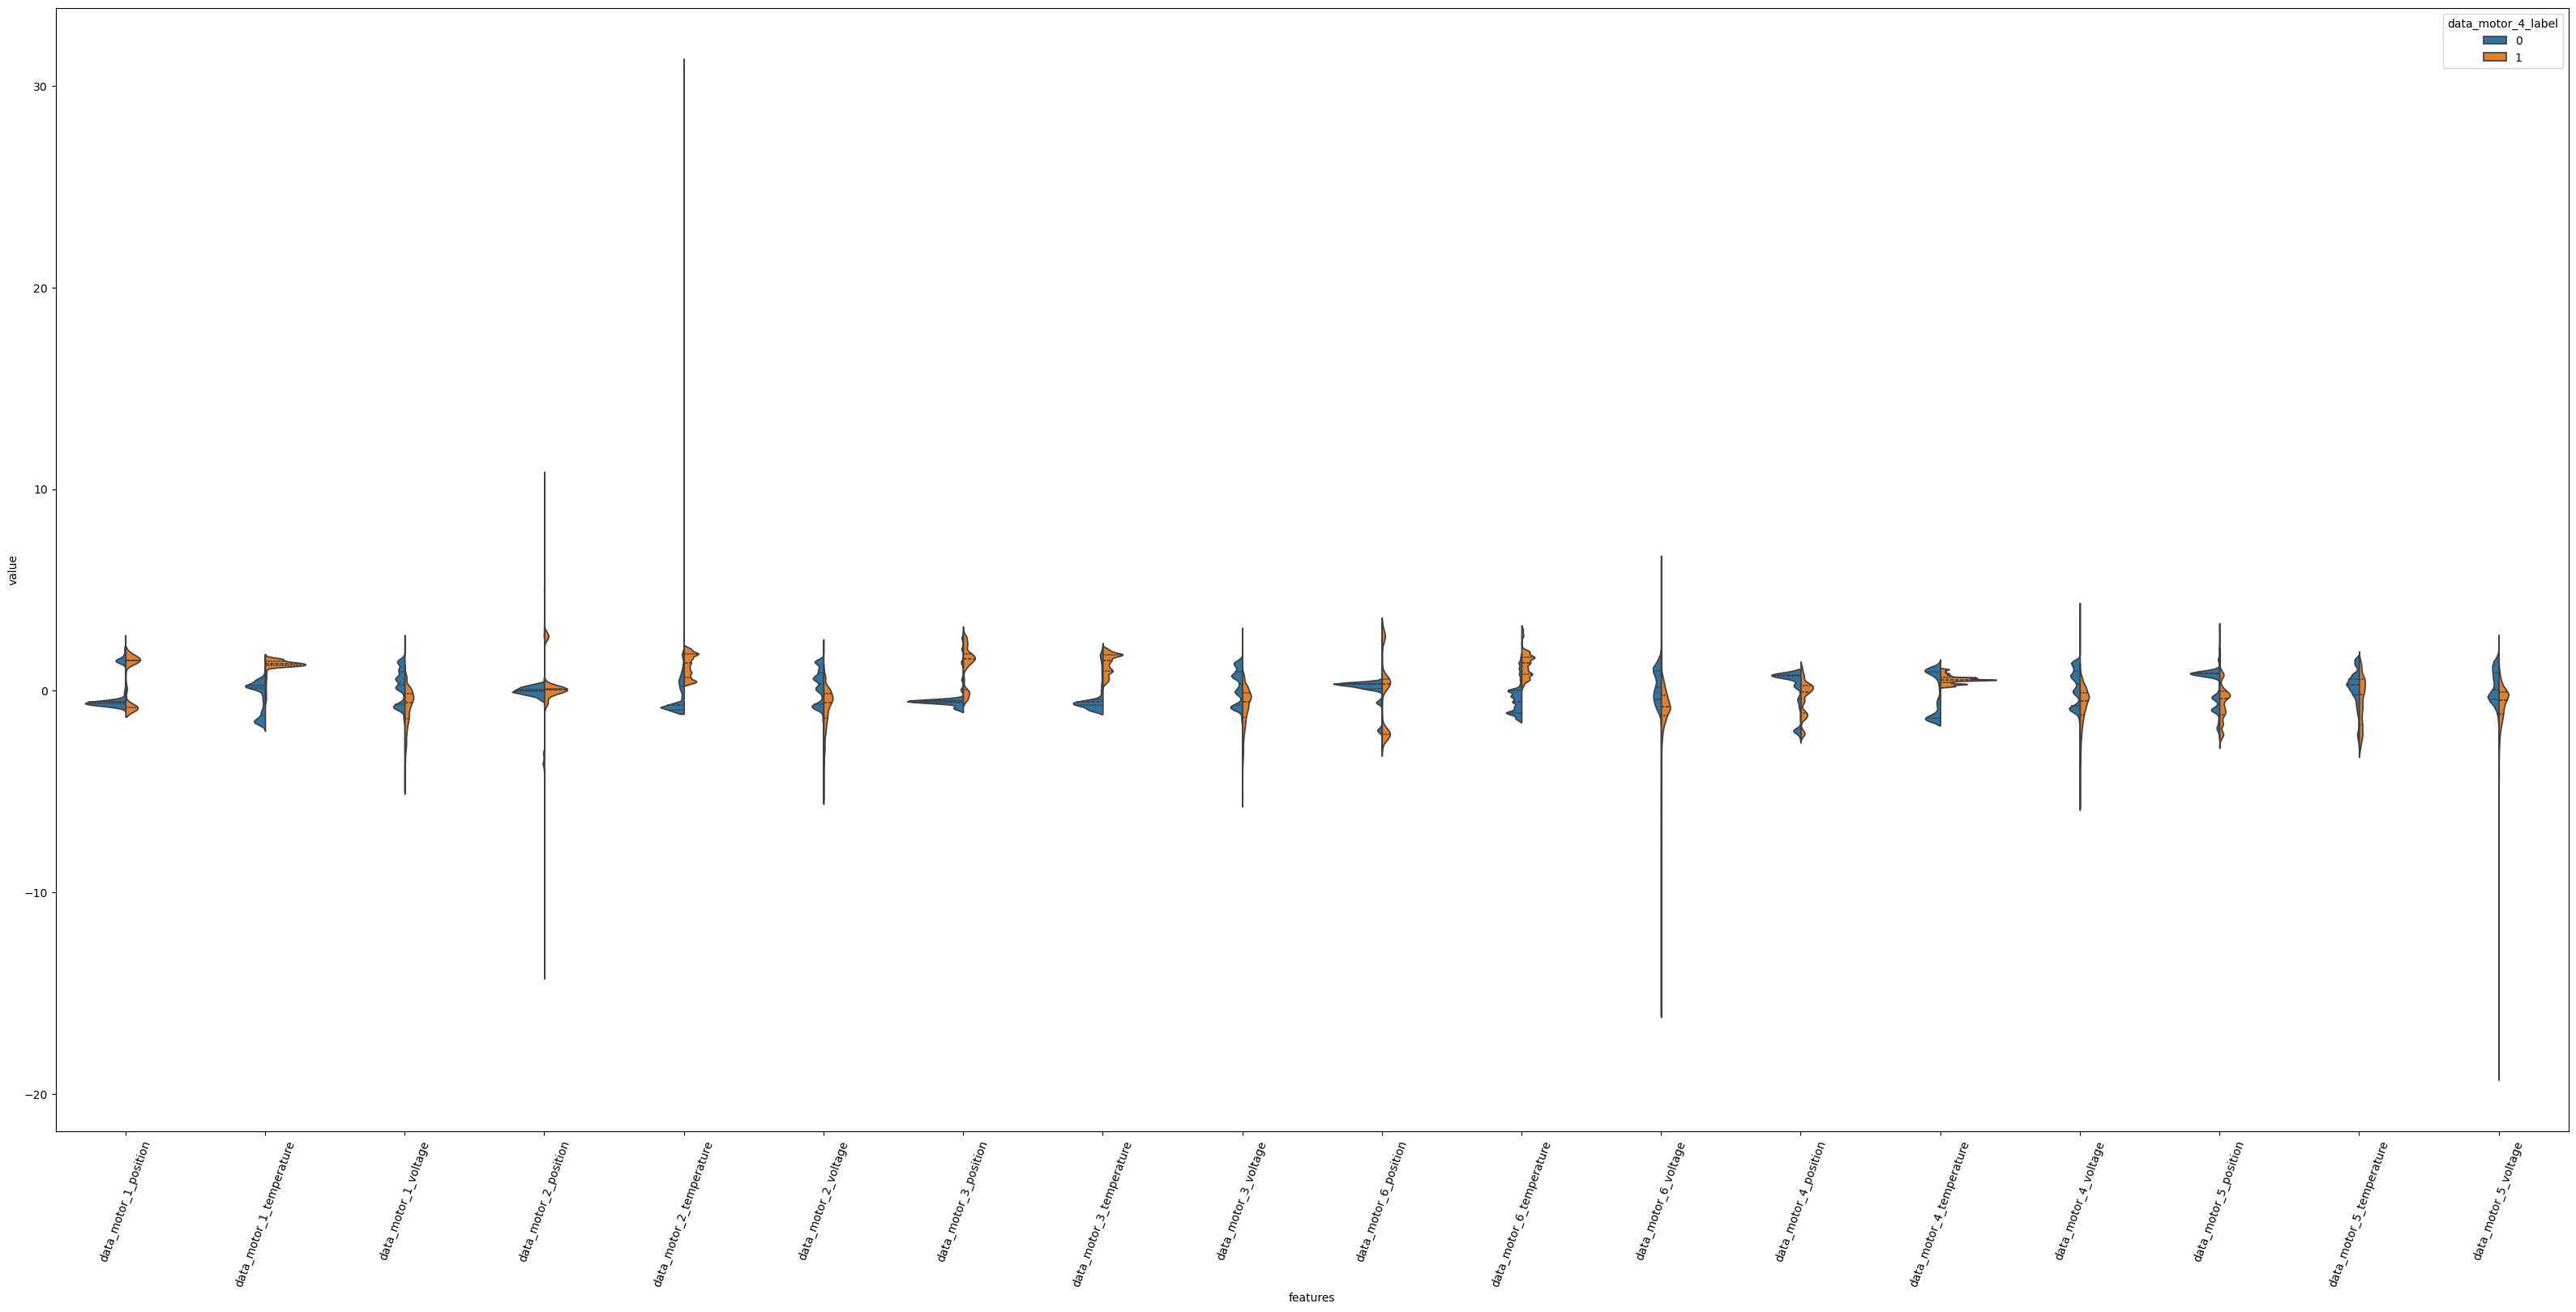

In [12]:
import matplotlib.pyplot  as plt

for label in label_col:

    plt.figure(figsize=(40, 18))

    temp_df = pd.concat([X_train_std, y[label]], axis=1)
    data = pd.melt(temp_df,id_vars=label,
                    var_name="features",
                    value_name='value')
    sns.violinplot(x="features", y="value", hue=label, data=data, split=True, inner="quart")
    plt.xticks(rotation=70)
    plt.show()

## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

In [13]:
# Combine the features with labels 
df_data_processed = pd.concat([time, X_train_std, y], axis=1)

# Compute correlation matrix
correlation_matrix = df_data_processed.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


<Axes: >

In [14]:
df_data_processed.corr()

time  data_motor_1_position  \
time                      1.000000               0.477542   
data_motor_1_position     0.477542               1.000000   
data_motor_1_temperature  0.295258               0.086343   
data_motor_1_voltage     -0.385625              -0.143589   
data_motor_2_position     0.001156               0.011065   
data_motor_2_temperature  0.298482               0.196553   
data_motor_2_voltage     -0.392516              -0.151448   
data_motor_3_position     0.430950               0.364237   
data_motor_3_temperature  0.810541               0.557835   
data_motor_3_voltage     -0.411537              -0.154692   
data_motor_6_position    -0.104448              -0.098707   
data_motor_6_temperature  0.483052               0.249350   
data_motor_6_voltage     -0.552021              -0.392351   
data_motor_4_position    -0.151844              -0.138469   
data_motor_4_temperature  0.655734               0.286502   
data_motor_4_voltage     -0.400724              -0.131595   
data_motor_5_position    -0.462560              -0.112112   
data_motor_5_temperature  0.100029               0.137867   
data_motor_5_voltage     -0.514456              -0.369976   
data_motor_1_label        0.267241               0.159991   
data_motor_2_label        0.711632               0.274946   
data_motor_3_label        0.048685              -0.033221   
data_motor_6_label        0.182900               0.162060   
data_motor_4_label        0.711632               0.274946   
data_motor_5_label        0.063811               0.070456   

                          data_motor_1_temperature  data_motor_1_voltage  \
time                                      0.295258             -0.385625   
data_motor_1_position                     0.086343             -0.143589   
data_motor_1_temperature                  1.000000             -0.562290   
data_motor_1_voltage                     -0.562290              1.000000   
data_motor_2_position                     0.246948             -0.122082   
data_motor_2_temperature                  0.539196             -0.197326   
data_motor_2_voltage                     -0.549042              0.956072   
data_motor_3_position                     0.541134             -0.313318   
data_motor_3_temperature                  0.305205             -0.436315   
data_motor_3_voltage                     -0.511890              0.949218   
data_motor_6_position                    -0.096058              0.144787   
data_motor_6_temperature                  0.461937             -0.509061   
data_motor_6_voltage                     -0.370668              0.712301   
data_motor_4_position                     0.236636             -0.409668   
data_motor_4_temperature                  0.206309             -0.655263   
data_motor_4_voltage                     -0.494846              0.941669   
data_motor_5_position                     0.215138             -0.168792   
data_motor_5_temperature                 -0.410395              0.030217   
data_motor_5_voltage                     -0.333310              0.705784   
data_motor_1_label                        0.173961             -0.111146   
data_motor_2_label                        0.655332             -0.427723   
data_motor_3_label                        0.049218             -0.053436   
data_motor_6_label                        0.146126             -0.033515   
data_motor_4_label                        0.655332             -0.427723   
data_motor_5_label                        0.061636             -0.051720   

                          data_motor_2_position  data_motor_2_temperature  \
time                                   0.001156                  0.298482   
data_motor_1_position                  0.011065                  0.196553   
data_motor_1_temperature               0.246948                  0.539196   
data_motor_1_voltage                  -0.122082                 -0.197326   
data_motor_2_position                  1.000000                  0.172832   
data

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?




From the correlation analysis, we found that the position of the motor generally have very small correlation with the label. For example, the correlation coefficient between data_motor_2_position/data_motor_6_position and all data_motor_x_labels are very small (mostly below 0.2)

Temperature generally have high correlation with the the labels. For example, the correlation coefficient between data_motor_4_label and data_motor_1/2/3/6_temperature is quite high(>0.6).

For feature selection, we can consider drop the time and position data, since they are not very relevant to the labels. 
